#M5 Forecasting - Accuracy  

(Estimate the unit sales of Walmart retail goods)

#1. Description

Department stores like Walmart have uncountable products and money transactions every day.Because of their rapid transaction rates,keeping a balance between inventory & customer is most important.Therefore,making an accurate sales prediction for different products becomes an essential need for stores to optimize profits.

#2. Source/Useful Links

1) https://www.kaggle.com/c/m5-forecasting-accuracy/overview/description

2)https://www.unic.ac.cy/unic-walmart-and-kaggle-launch-m5-forecasting-competition/





#3. Data Overview

#“calendar.csv”

Contains information about the dates the products are sold

-> date: The date in a “y-m-d” format

-> wm_yr_wk: The id of the week the date belongs to

-> weekday: The type of the day (Saturday, Sunday, …, Friday)

-> wday: The id of the weekday, starting from Saturday

-> month: The month of the date

-> year: The year of the date

-> event_name_1: If the date includes an event, the name of this event

-> event_type_1: If the date includes an event, the type of this event

-> event_name_2: If the date includes a second event, the name of this event

-> event_type_2: If the date includes a second event, the type of this event

-> snap_CA,snap_TX, & snap_WI: A binary variable indicating whether the stores of CA,TX or WI allow SNAP2 purchases on the examined date

#“sell_prices.csv”

Contains information about the price of the products sold per store and date

-> store_id: The id of the store where the product is sold

-> item_id: The id of the product

-> wm_yr_wk: The id of the week

-> sell_price: The price of the product for the given week/store.The price is provided per week 
(average across seven days).
If not available,this means that the product was not sold during the 
examined week.Note that although prices are constant at weekly basis,they may change through 
time (both training and test set

#“sales_train.csv”

Contains the historical daily unit sales data per product and store

-> item_id: The id of the product

-> dept_id: The id of the department the product belongs to

-> cat_id: The id of the category the product belongs to

-> store_id: The id of the store where the product is sold

-> state_id: The State where the store is located

-> d_1,d_2,…,d_i,…d_1941:The number of units sold at day i,starting from 2011-01-29

#4. Objective

* Our main Objective is to predict the products sales for the next 28 days

#5. Performance Metric

* 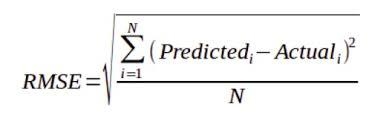

* RMSE plays important rule when we have to focus more on Predictions 

* RMSE does not treat each error the same.It gives more importance to the most significant errors.

* That means than one big error is enough to get a bad RMSE


#6. Why ML Models better than Classical Methods 

* It is found that Classical methods may dominate for one step forecasting

* While ML Models works better in case of Multi-Step Forecasting 

* Here we are working on Multi-Step Forecasting thus ML Models will be better choice 

In [ ]:
pip install downcast

In [ ]:
import pandas as pd
import pickle
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from downcast import reduce
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.dates as dates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
calendar_=pd.read_csv('/content/drive//My Drive/CS-1/calendar.csv')
calendar_.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
calendar_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


* Among all days 162 days have Special Events

* And in 162 days 5 days had multiple Events.


In [ ]:
calendar_['event_type_1'].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [ ]:
calendar_['event_type_2'].value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

In [ ]:
#Names of Each Events with their counts
calendar_['event_name_1'].value_counts()

LentStart              6
NBAFinalsEnd           6
NBAFinalsStart         6
MemorialDay            6
PresidentsDay          6
Pesach End             6
ValentinesDay          6
Purim End              6
Ramadan starts         6
StPatricksDay          6
Mother's day           6
SuperBowl              6
LentWeek2              6
Christmas              5
OrthodoxChristmas      5
Thanksgiving           5
LaborDay               5
MartinLutherKingDay    5
EidAlAdha              5
Eid al-Fitr            5
VeteransDay            5
Easter                 5
OrthodoxEaster         5
NewYear                5
Halloween              5
Cinco De Mayo          5
ColumbusDay            5
Chanukah End           5
IndependenceDay        5
Father's day           4
Name: event_name_1, dtype: int64

In [ ]:
calendar_['event_name_2'].value_counts()

Father's day      2
Cinco De Mayo     1
OrthodoxEaster    1
Easter            1
Name: event_name_2, dtype: int64

* We can see that event features contains many 'NaN' values

* Replace all 'NaN' values in event faetures with 'no_event'






* In Snap Features:  
  * replace '0' with 'no_snap'

  * replace '1' with 'snap'

* Replace all months with corresponding numeric values 

In [ ]:
cal_=calendar_.fillna('no_event')
snap=['snap_CA','snap_TX','snap_WI']
for i in snap:
  cal_[i]=cal_[i].replace(0,'no_snap')
  cal_[i]=cal_[i].replace(1,'snap')
month=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
for i in range(len(month)):
  cal_['month']=cal_['month'].replace(i+1,month[i])

* Adding feature 'is_weekend' which tells about that day is weekend or not

In [ ]:
f=lambda x: 1 if x<=2 else 0
#https://stackoverflow.com/questions/21608228/conditional-replace-pandas
cal_['is_weekend']=cal_['wday'].map(f) 
cal_['is_weekend']=cal_['is_weekend'].astype(np.int8)

* Adding feature 'events_per_day' which tells us number of events on particular day

In [ ]:
f=lambda x: 0 if x=='no_event' else 1
#https://stackoverflow.com/questions/21608228/conditional-replace-pandas
cal_['events_per_day']=cal_['event_type_1'].map(f)
#https://www.kite.com/python/answers/how-to-get-the-indices-of-rows-in-a-pandas-dataframe-which-satisfy-a-given-condition-in-python
index=cal_.index
indices=index[cal_['event_type_2']!='no_event'].tolist()
for i in indices:
  cal_['events_per_day'][i]+=1
cal_['events_per_day']=cal_['events_per_day'].astype(np.int8)

* Adding feature 'is_holiday' which tells about on that day holiday or not

* If day have events it means holiday otherwise no holiday 

In [ ]:
f=lambda x: 1 if x>0 else 0
#https://stackoverflow.com/questions/21608228/conditional-replace-pandas
cal_['is_holiday']=cal_['events_per_day'].map(f) 
cal_['is_holiday']=cal_['is_holiday'].astype(np.int8)

In [ ]:
cal_['month_']=calendar_['month']

* Adding feature 'day' which tells about which day of the month

In [ ]:
day=cal_["date"].tolist()
day=[i.split("-")[2] for i in day]
cal_["day"]=day

In [ ]:
cal_.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_weekend,events_per_day,is_holiday,day,month_
0,2011-01-29,11101,Saturday,1,Jan,2011,d_1,no_event,no_event,no_event,no_event,no_snap,no_snap,no_snap,1,0,0,29,1
1,2011-01-30,11101,Sunday,2,Jan,2011,d_2,no_event,no_event,no_event,no_event,no_snap,no_snap,no_snap,1,0,0,30,1
2,2011-01-31,11101,Monday,3,Jan,2011,d_3,no_event,no_event,no_event,no_event,no_snap,no_snap,no_snap,0,0,0,31,1


In [ ]:
sales_train_evaluation_=pd.read_csv('/content/drive//My Drive/CS-1/sales_train_evaluation.csv')
sales_train_evaluation_.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1


In [ ]:
sales_train_validation_=pd.read_csv('/content/drive//My Drive/CS-1/sales_train_validation.csv')
sales_train_validation_.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1


In [ ]:
sell_prices_=pd.read_csv('/content/drive//My Drive/CS-1/sell_prices.csv')
sell_prices_.head(3)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26


#1. Downcasting

* Downcasting the dataframes to reduce the amount of storage used by them and 
also to execute the operations performed on them more faster.

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.memory_usage.html
x=cal_.memory_usage(deep=True).sum()/1024**2 
cal_=reduce(cal_)
y=cal_.memory_usage(deep=True).sum()/1024**2
print("Memory usage decreased to {:.2f} Mb ({:.1f} % reduction)".format(y,100*(x-y)/x))

Memory usage decreased to 0.26 Mb (82.7 % reduction)


In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.memory_usage.html
x=sales_train_evaluation_.memory_usage(deep=True).sum()/1024**2 
sales_train_evaluation_=reduce(sales_train_evaluation_)
y=sales_train_evaluation_.memory_usage(deep=True).sum()/1024**2
print("Memory usage decreased to {:.2f} Mb ({:.1f} % reduction)".format(y,100*(x-y)/x))

Memory usage decreased to 98.99 Mb (78.6 % reduction)


In [ ]:
x=sell_prices_.memory_usage(deep=True).sum()/1024**2
sell_prices_=reduce(sell_prices_)
y=sell_prices_.memory_usage(deep=True).sum()/1024**2
print("Memory usage decreased to {:.2f} Mb ({:.1f} % reduction)".format(y,100*(x-y)/x))

Memory usage decreased to 45.95 Mb (95.2 % reduction)


In [ ]:
s=pd.melt(sales_train_evaluation_,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='demand')
s=pd.merge(s,cal_,on='d',how='left')
revenue=pd.merge(s,sell_prices_,on=['item_id','store_id','wm_yr_wk'],how='left')
#Calculating total cost on that day (cost = no. of sales of item * sell price of item)
revenue['cost']=revenue.demand*revenue.sell_price 
#https://stackoverflow.com/questions/14059094/i-want-to-multiply-two-columns-in-a-pandas-dataframe-and-add-the-result-into-a-n

In [ ]:
revenue=revenue.dropna()

In [ ]:
x=revenue.memory_usage(deep=True).sum()/1024**2
revenue=reduce(revenue)
y=revenue.memory_usage(deep=True).sum()/1024**2
print("Memory usage decreased to {:.2f} Mb ({:.1f} % reduction)".format(y,100*(x-y)/x))

Memory usage decreased to 2284.43 Mb (55.0 % reduction)


In [ ]:
revenue.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_weekend,events_per_day,is_holiday,month_,day,sell_price,cost
7,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,Saturday,1,Jan,2011,no_event,no_event,no_event,no_event,no_snap,no_snap,no_snap,1,0,0,1,29,0.459961,5.519531
8,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,Saturday,1,Jan,2011,no_event,no_event,no_event,no_event,no_snap,no_snap,no_snap,1,0,0,1,29,1.559570,3.119141
9,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,Jan,2011,no_event,no_event,no_event,no_event,no_snap,no_snap,no_snap,1,0,0,1,29,3.169922,0.000000


In [ ]:
def patch1(bar,ax):
  #https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib
  for p in bar.patches: 
     width=p.get_width()
     height=p.get_height()
     x,y=p.get_xy() 
     ax.annotate('{}%'.format(height),(x+width/2,y+height*1.02),ha='center',fontsize=14)

In [ ]:
def patch2(a,ax):
  #https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib
  for p in a.patches:  
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy() 
    ax.annotate('{:.2f}'.format(height),(x+width/2,y+height*1.02),ha='center',fontsize=13)

#Calendar

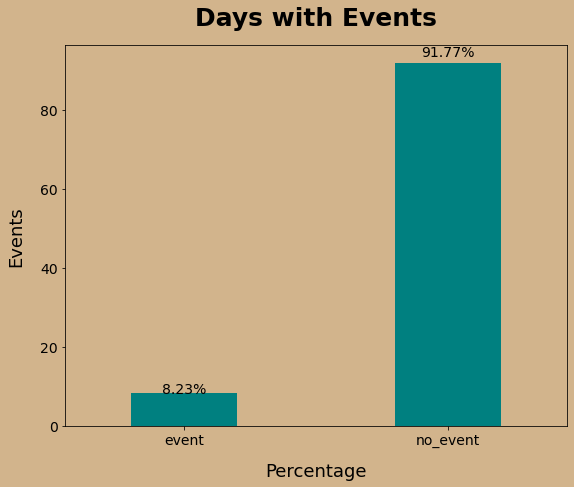

In [ ]:
l=[]
l=np.unique(calendar_[calendar_['event_type_1'].notnull()]['d'].tolist()) 
df=pd.DataFrame([["event",np.round((len(l)/calendar_.shape[0]*100),2)],["no_event",100-np.round((len(l)/calendar_.shape[0]*100),2)]],columns=['Events','Percentage'])
fig,axes=plt.subplots(figsize=(9,7))
a=df.plot(kind='bar',y='Percentage',x='Events',width=0.4,ax=axes,color='teal')      
patch1(a,axes)                                                                      
plt.title('Days with Events',loc='center',fontsize=25,pad='20',fontweight='bold')
axes.set_xlabel('Percentage',fontsize=18,labelpad=15)
axes.set_ylabel('Events',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
axes.get_legend().remove()
axes.set_facecolor("tan")
fig.set_facecolor("tan")
plt.show() 

* About 8% of days have a special events while remaining 92% of days have no events 

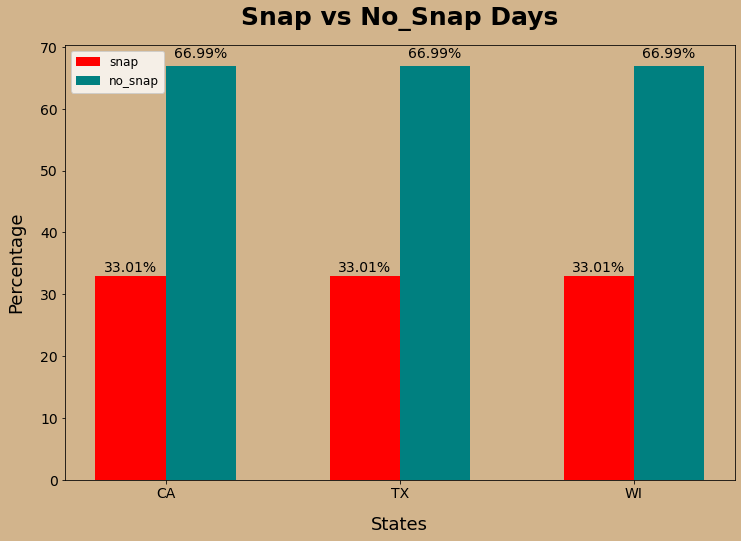

In [ ]:
l1=[] #https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
l2=[]
l3=[]
l1=np.unique(cal_[cal_['snap_CA']=='snap']['d'].tolist()) 
l2=np.unique(cal_[cal_['snap_TX']=='snap']['d'].tolist()) 
l3=np.unique(cal_[cal_['snap_WI']=='snap']['d'].tolist()) 
labels=['CA','TX','WI']
snap=[np.round((len(l1)/cal_.shape[0]*100),2), np.round((len(l2)/cal_.shape[0]*100),2), np.round((len(l3)/cal_.shape[0]*100),2)]
no_snap=[np.round((100-(len(l1)/cal_.shape[0]*100)),2),np.round((100-(len(l2)/cal_.shape[0]*100)),2),np.round((100-(len(l3)/cal_.shape[0]*100)),2)]
x=np.arange(len(labels))  # the label locations
width=0.30  # the width of the bars
fig,ax=plt.subplots(figsize=(12,8))
bar1=ax.bar(x-width/2,snap,width,label='snap',color='red')
bar2=ax.bar(x+width/2,no_snap,width,label='no_snap',color='teal')
ax.set_ylabel('Percentage',fontsize=18,labelpad=15)
ax.set_xlabel('States',fontsize=18,labelpad=15)
ax.set_title('Snap vs No_Snap Days',loc='center',fontsize=25,pad='20',fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=12)       
patch1(bar1,ax)
patch1(bar2,ax)
ax.set_facecolor("tan")
fig.set_facecolor("tan")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show() 

* Percentage of days where purchases with SNAP are allowed in Walmart stores we 
find that it is same for each of the 3 states is '33%'

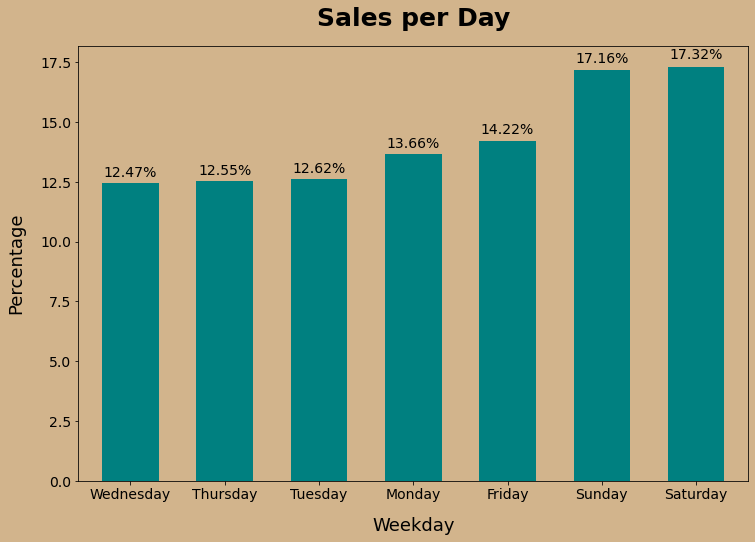

In [ ]:
d=revenue[['weekday','demand']]
d=d.groupby(by='weekday').sum('demand').reset_index()
d['percent']=np.round(d['demand']/d['demand'].sum()*100,2)
d=d.sort_values('percent')
fig,axes=plt.subplots(figsize=(12,8))
a=d.plot(kind='bar',x='weekday',y='percent',width=0.6,ax=axes,color='teal')
patch1(a,axes)
plt.title('Sales per Day',loc='center',fontsize=25,pad='20',fontweight='bold')
axes.set_ylabel('Percentage',fontsize=18,labelpad=15)
axes.set_xlabel('Weekday',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
axes.get_legend().remove()
axes.set_facecolor("tan")
fig.set_facecolor("tan")
plt.show() 

* Sales fall from Monday to Wednesday & have a rise from Thursday to Saturday with a little fall on Sunday

* Sales are higher during weekends as compared to non-weekends

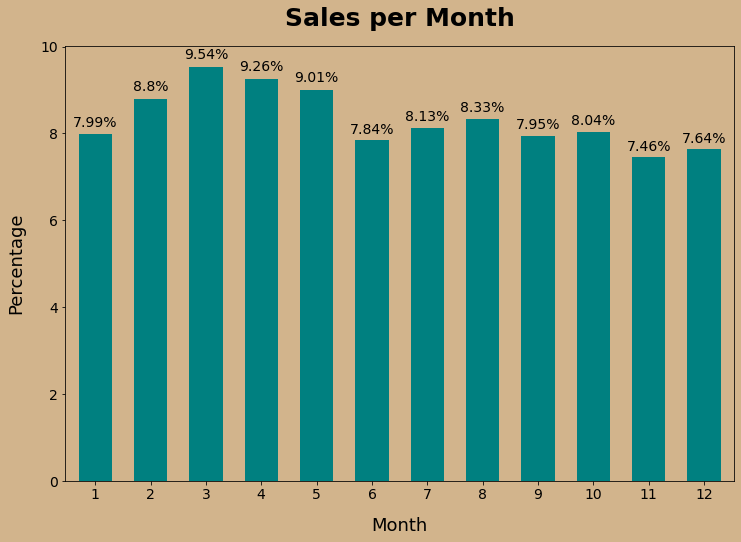

In [ ]:
d=revenue[['month_','demand']]
d=d.groupby(by='month_').sum('demand').reset_index()
d['percent']=np.round(d['demand']/d['demand'].sum()*100,2)
fig,axes=plt.subplots(figsize=(12,8))
a=d.plot(kind='bar',x='month_',y='percent',width=0.6,ax=axes,color='teal')
patch1(a,axes)
plt.title('Sales per Month',loc='center',fontsize=25,pad='20',fontweight='bold')
axes.set_ylabel('Percentage',fontsize=18,labelpad=15)
axes.set_xlabel('Month',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
axes.get_legend().remove()
axes.set_facecolor("tan")
fig.set_facecolor("tan")
plt.show() 

* Sales rise from Jan to March after that it falls till June

* After June Sales rise and fall goes on 

* March, April, May have highest sales among all months 

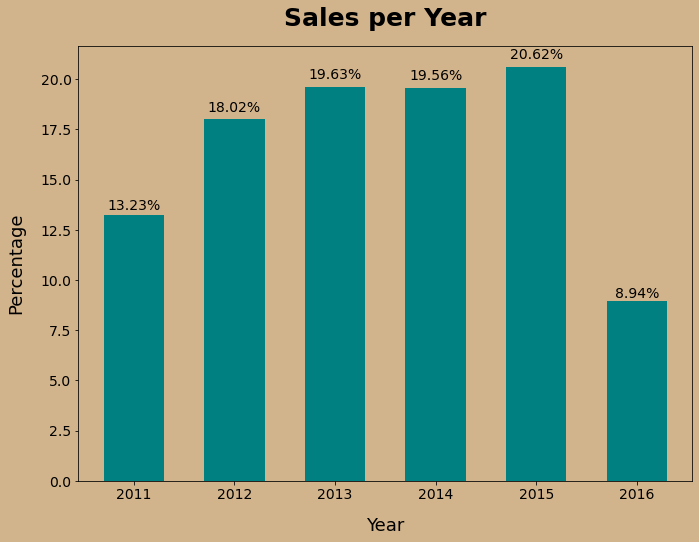

In [ ]:
d=revenue[['year','demand']]
d=d.groupby(by='year').sum('demand').reset_index()
d['percent']=np.round(d['demand']/d['demand'].sum()*100,2)
d=d.sort_values('year')
fig,axes=plt.subplots(figsize=(11,8))
a=d.plot(kind='bar',x='year',y='percent',width=0.6,ax=axes,color='teal')
patch1(a,axes)
plt.title('Sales per Year',loc='center',fontsize=25,pad='20',fontweight='bold')
axes.set_ylabel('Percentage',fontsize=18,labelpad=15)
axes.set_xlabel('Year',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
axes.get_legend().remove()
axes.set_facecolor("tan")
fig.set_facecolor("tan")
plt.show() 

* Sales rise from year 2011 to 2015 with a slight decrease in year 2014

* But in year 2016 suddenly there is huge decrease in sales

* The sales becomes lowest in year 2016 while highest in year 2015

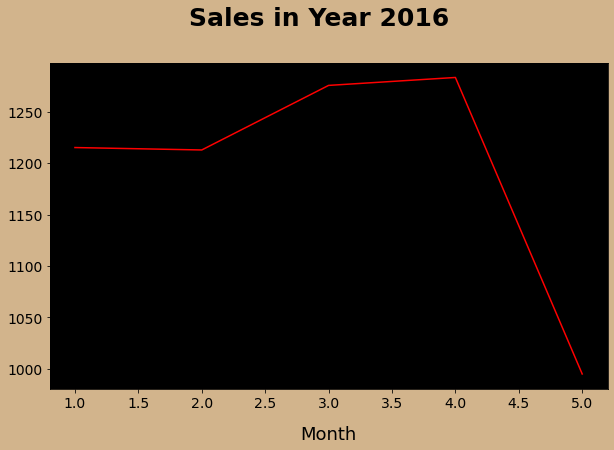

In [ ]:
d=revenue[['year','month_','day','demand']]
e=d.loc[d['year']==2016]
e=e[['month_','demand']]
e['demand']=e['demand'].div(1e3)
fig,ax=plt.subplots(figsize=(10,6))
fig.suptitle('Sales in Year 2016',fontsize=25,fontweight='bold',y=1.01) 
e.groupby('month_').sum().plot(kind='line',ax=ax,color='red')
ax.set_facecolor('black')
ax.set_xlabel('Month',fontsize=18,labelpad=15)
ax.tick_params(axis='both',labelsize=14)
ax.get_legend().remove()
fig.set_facecolor("tan")
plt.show()

* Data available till 5th month (May) of 2016 only 

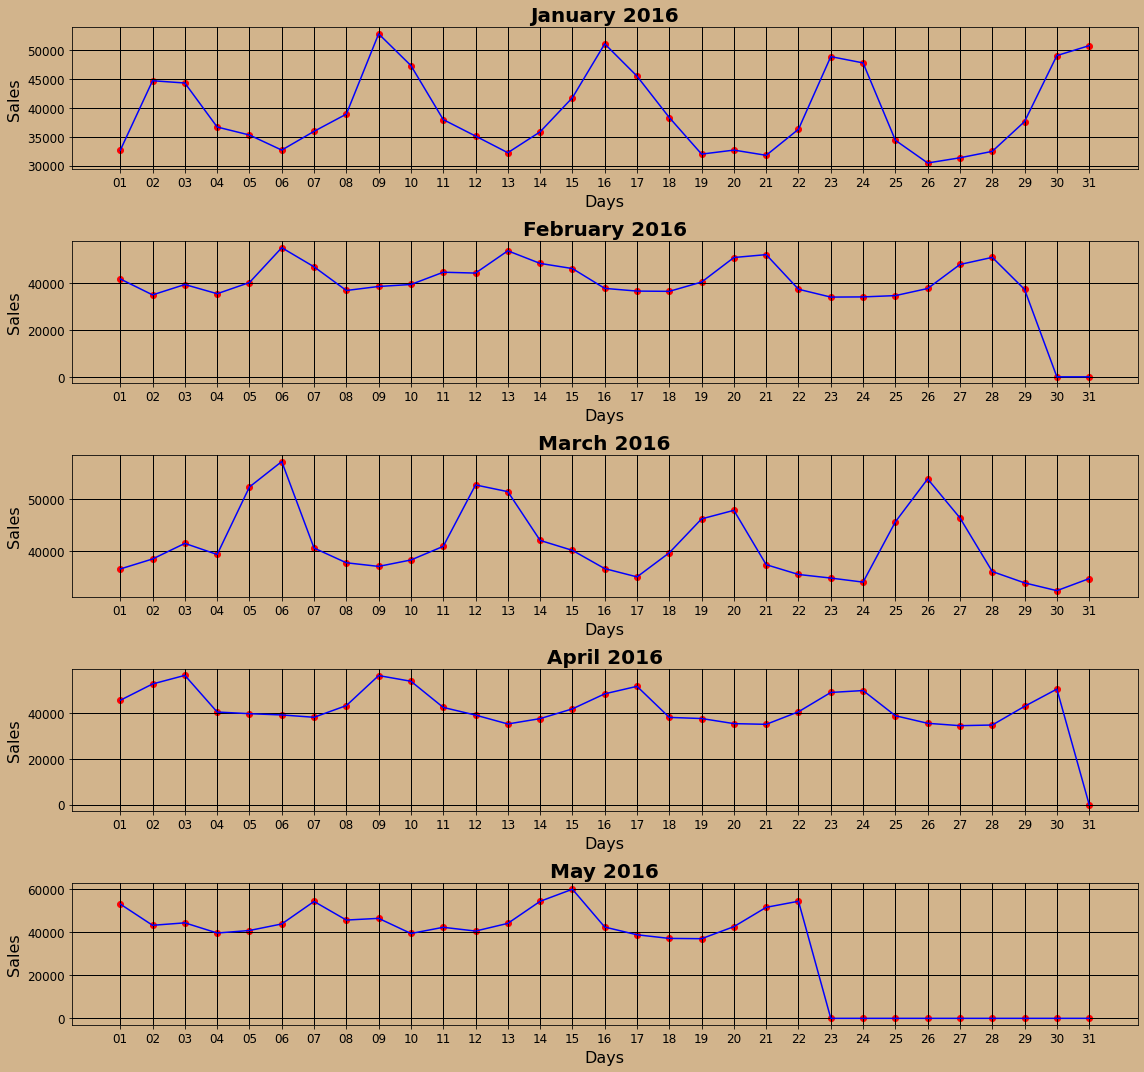

In [ ]:
m=[1,2,3,4,5]
m_=['January','February','March','April','May']
fig=plt.figure(figsize=(16,15))
for i in range(len(m)):
  e=d.loc[d['year']==2016]
  e=e.loc[e['month_']==m[i]]
  e=e[['day','demand']]
  e=e.groupby('day').sum().reset_index() 
  ax=plt.subplot(5,1,i+1)
  ax.set_title(m_[i]+' 2016',fontsize=20,fontweight='bold')
  ax.scatter(e['day'].tolist(),e['demand'].tolist(),color='r',zorder=1)
  ax.plot(e['day'].tolist(),e['demand'].tolist(),color='b',zorder=2)
  ax.tick_params(axis='both',labelsize=12)
  ax.set_ylabel('Sales',fontsize=16,labelpad=5)
  ax.set_xlabel('Days',fontsize=16,labelpad=5)
  ax.grid(True,color ="black")
  ax.set_facecolor("tan")
  fig.set_facecolor("tan")
plt.tight_layout()
plt.show()

* Data is  available till May 2016 only & from 23rd May there is no sales 

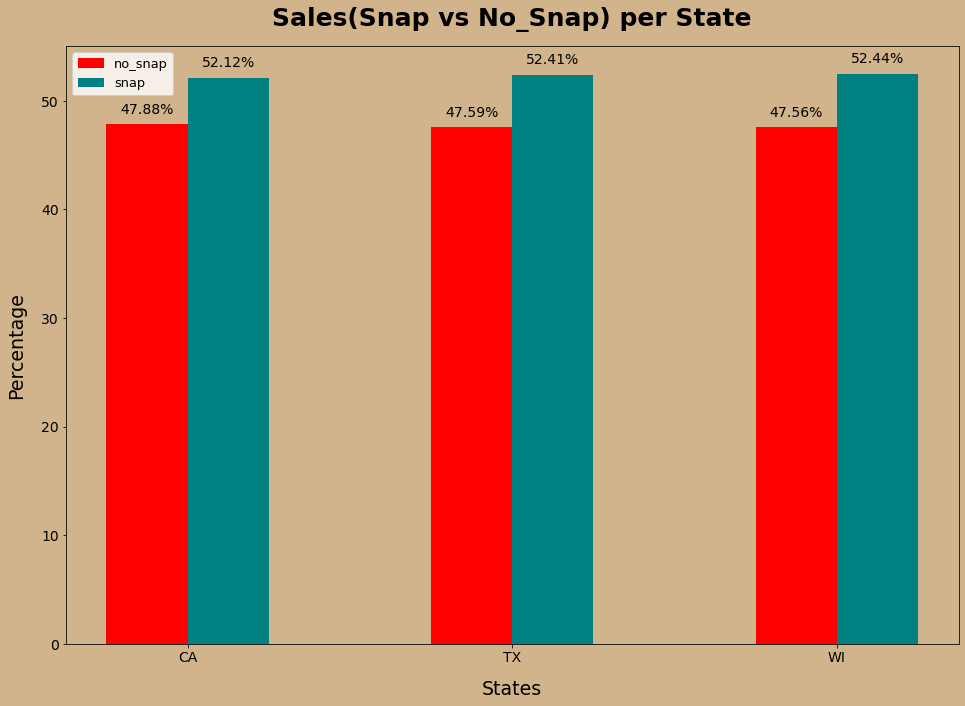

In [ ]:
d=revenue[['snap_CA','snap_TX','snap_WI','demand']]
d1=d.groupby(by='snap_CA').mean('demand').reset_index()
d1['percent']=np.round(d1['demand']/d1['demand'].sum()*100,2)
d2=d.groupby(by='snap_TX').mean('demand').reset_index()
d2['percent']=np.round(d2['demand']/d2['demand'].sum()*100,2)
d3=d.groupby(by='snap_WI').mean('demand').reset_index()
d3['percent']=np.round(d3['demand']/d3['demand'].sum()*100,2)
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels=['CA','TX','WI'] 
no_snap=[d1['percent'][0],d2['percent'][0],d3['percent'][0]]
snap=[d1['percent'][1],d2['percent'][1],d3['percent'][1]]
x=np.arange(len(labels))  # the label locations
width=0.25  # the width of the bars
fig,ax=plt.subplots(figsize=(16,11))
bar1=ax.bar(x-width/2,no_snap,width,label='no_snap',color='red')
bar2=ax.bar(x+width/2,snap,width,label='snap',color='teal')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage',fontsize=19,labelpad=15)
ax.set_xlabel('States',fontsize=19,labelpad=15)
ax.set_title('Sales(Snap vs No_Snap) per State',loc='center',fontsize=25,pad='20',fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=13)      
ax.set_facecolor("tan")
patch1(bar1,ax)
patch1(bar2,ax)
ax.set_facecolor("tan")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
fig.set_facecolor("tan")
plt.show()

* Sales on all the states during the Snap days are high than Non-Snap days
 
* In every state difference between Sales during Snap Days & Non-Snap days is not much

* Sales is almost same in every state for Snap days 

* Sales is almost same in every state for non-Snap days 

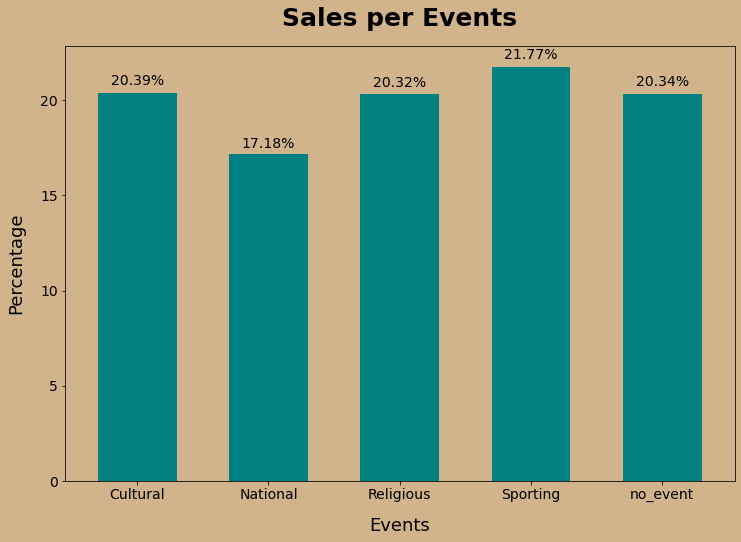

In [ ]:
d=revenue[['event_type_1','demand']]
d=d.groupby(by='event_type_1').mean('demand').reset_index()
d['percent']=np.round(d['demand']/d['demand'].sum()*100,2)
fig,axes=plt.subplots(figsize=(12,8))
a=d.plot(kind='bar',x='event_type_1',y='percent',width=0.6,ax=axes,color='teal')
patch1(a,axes)
plt.title('Sales per Events',loc='center',fontsize=25,pad='20',fontweight='bold')
axes.set_ylabel('Percentage',fontsize=18,labelpad=15)
axes.set_xlabel('Events',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
axes.get_legend().remove()
axes.set_facecolor("tan")
fig.set_facecolor("tan")
plt.show() 

* Sales during Sporting event is slightly more than sales on non events days

* Sales on National event are less than the sales on other events & non events days

* Among all events days Sales are highest on Sporting event and lowest on national events days


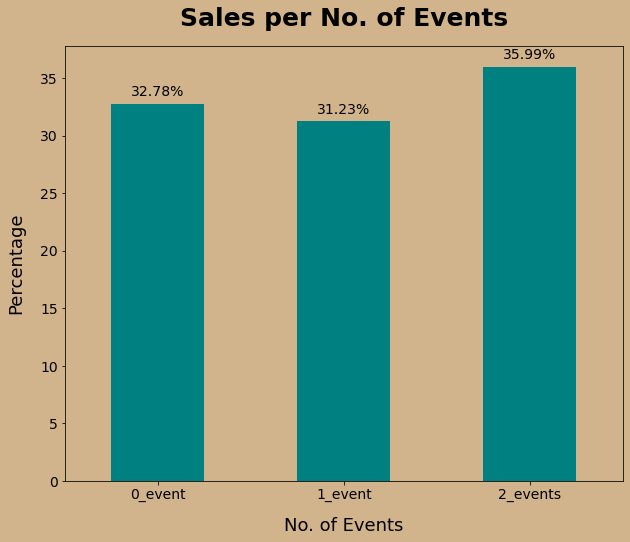

In [ ]:
d=revenue[['events_per_day','demand']]
d=d.groupby(by='events_per_day').mean('demand').reset_index()
d['percent']=np.round(d['demand']/d['demand'].sum()*100,2)
events=['0_event','1_event','2_events']
for i in range(len(events)):
  d['events_per_day']=d['events_per_day'].replace(i,events[i])
fig,axes=plt.subplots(figsize=(10,8))
a=d.plot(kind='bar',x='events_per_day',y='percent',width=0.5,ax=axes,color='teal')
patch1(a,axes)
plt.title('Sales per No. of Events',loc='center',fontsize=25,pad='20',fontweight='bold')
axes.set_ylabel('Percentage',fontsize=18,labelpad=15)
axes.set_xlabel('No. of Events',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
axes.get_legend().remove()
axes.set_facecolor("tan")
fig.set_facecolor("tan")
plt.show()

* Days with multiple events have highest sales 

* Days with no events have lowest sales

* Overall sales on event day is higher than non event day 



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



# Department

In [ ]:
def func1(x,y,z):
  j=0
  for i in y:
    df1=df[[x,i]]
    df1[i]=df1[i].div(1e3)
    df1=df1.groupby(x).sum()
    plt.plot(df1,color=z[j],label=i)
    j+=1

In [ ]:
def x1(df,y,ax,color):
  df.plot(x='date',y=y,ax=ax,color=color)
  ax.set_facecolor('black')
  ax.set_xlabel(' ')
  ax.tick_params(axis ='both',labelsize=12)
  ax.legend(fontsize=11)

In [ ]:
print(sales_train_evaluation_['dept_id'].unique().tolist())

['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1', 'FOODS_2', 'FOODS_3']


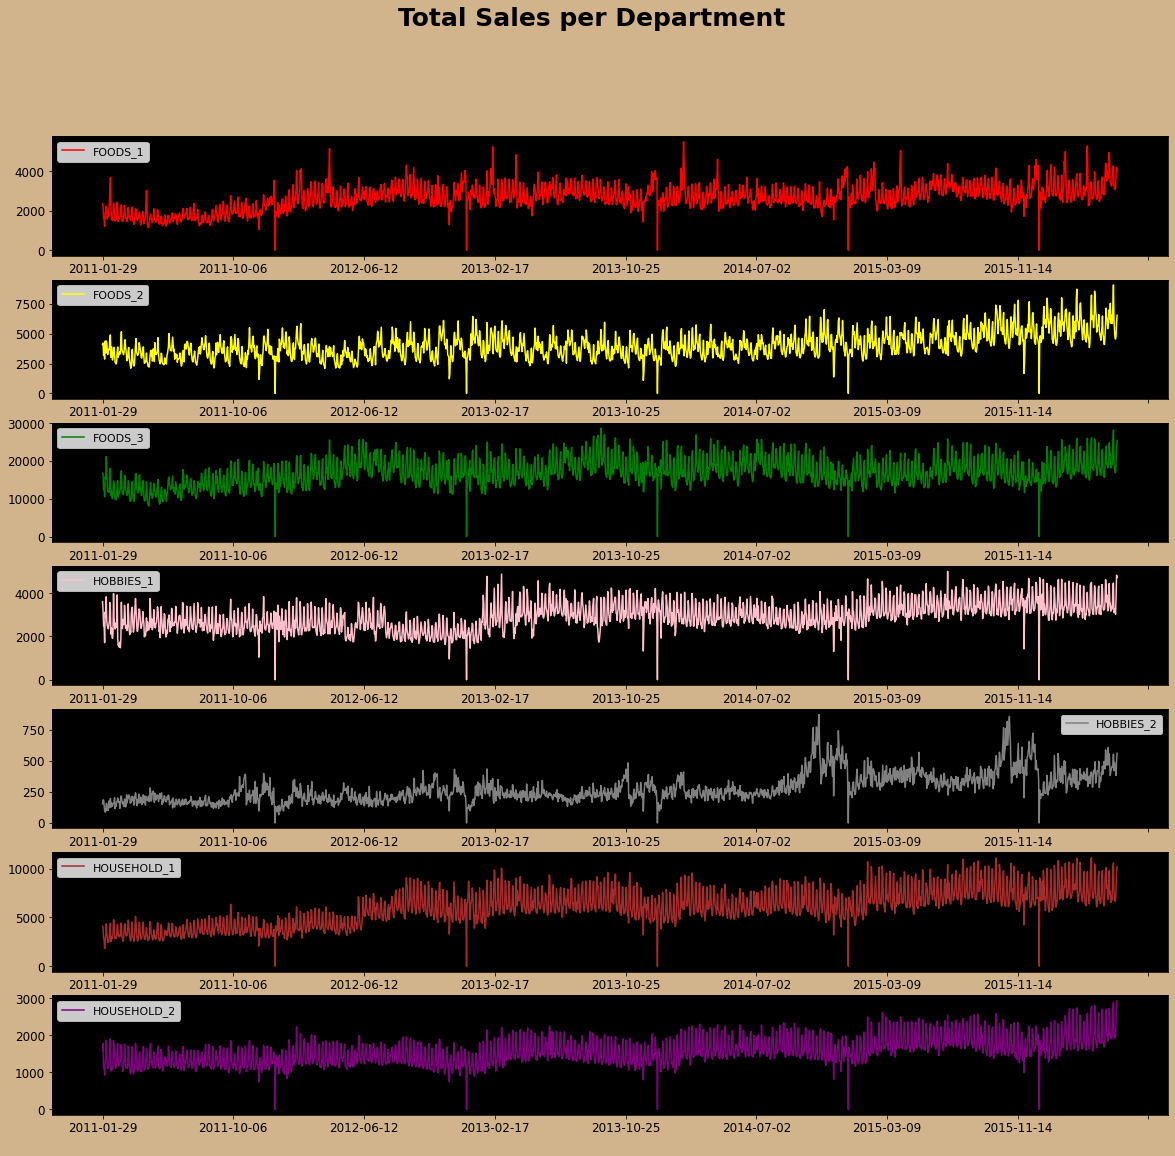

In [ ]:
d=sales_train_evaluation_.groupby(['dept_id']).sum().transpose()
#https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
d.columns=d.columns.add_categories('index') 
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(calendar_[['date','d']],on='d')
fig,axes=plt.subplots(7,1,figsize=(20,18))
plt.subplots_adjust(wspace=0.25)
fig.suptitle('Total Sales per Department',fontsize=25,fontweight='bold')
x1(df,'FOODS_1',axes[0],'red')
x1(df,'FOODS_2',axes[1],'yellow')
x1(df,'FOODS_3',axes[2],'green')
x1(df,'HOBBIES_1',axes[3],'pink')
x1(df,'HOBBIES_2',axes[4],'gray')
x1(df,'HOUSEHOLD_1',axes[5],'brown')
x1(df,'HOUSEHOLD_2',axes[6],'purple')
fig.set_facecolor("tan")
plt.show()

* From all above subplots we can observe that days at last of every year have "Zero" sales It might be because of Christmas days.

* May be during chirstmas day the store remains closed

In [ ]:
#https://www.kite.com/python/answers/how-to-drop-rows-with-all-zeros-in-a-pandas-dataframe-in-python#:~:text=DataFrame%20as%20(df%20!%3D,non%2Dzero%20values%20using%20pandas.
m=(df==0).any(axis=1) 
c=df.loc[m]
l=c['d']
d=cal_.loc[cal_['d'].isin(l)]
d

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_weekend,events_per_day,is_holiday,month_
330,2011-12-25,11148,Sunday,2,Dec,2011,d_331,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,1,1,1,12
696,2012-12-25,11248,Tuesday,4,Dec,2012,d_697,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12
1061,2013-12-25,11348,Wednesday,5,Dec,2013,d_1062,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12
1426,2014-12-25,11447,Thursday,6,Dec,2014,d_1427,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12
1791,2015-12-25,11547,Friday,7,Dec,2015,d_1792,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12


* One can observe that each year on Christmas Day there is zero sales 

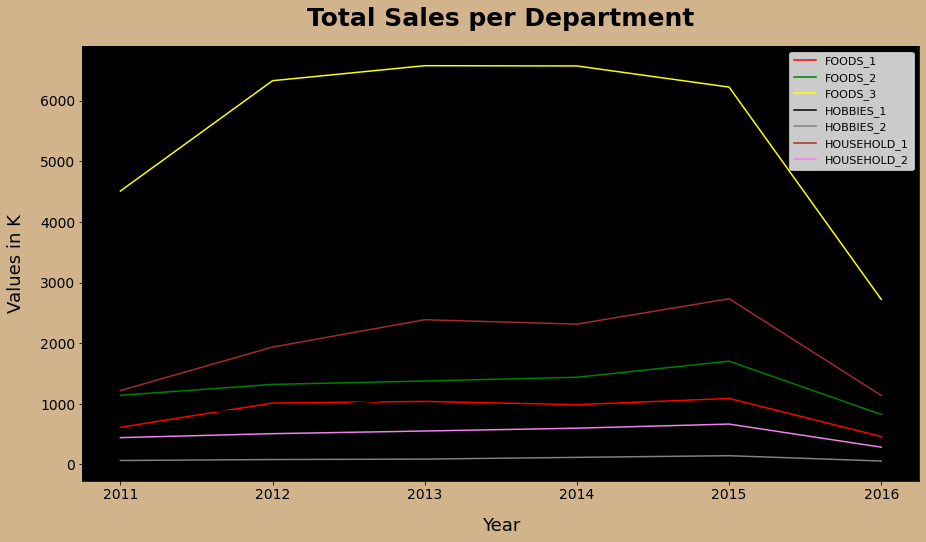

In [ ]:
d=sales_train_evaluation_.groupby(['dept_id']).sum().transpose()
#https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
d.columns=d.columns.add_categories('index') 
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(calendar_[['year','d']],on='d')
dept=['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']
color=['red','green','yellow','black','gray','brown','violet']
plt.figure(figsize=(15,8),facecolor='tan')
func1('year',dept,color)
plt.ylabel("Values in K",fontsize=18,labelpad=15)
plt.xlabel("Year",fontsize=18,labelpad=15)
plt.title("Total Sales per Department",loc='center',fontsize=25,pad='20',fontweight='bold')
plt.legend(fontsize=11.18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axes().set_facecolor("black")
plt.show()

* Sales of FOODS_3 is highest among all Departments.We can observe huge difference in sales of FOODS_3 and rest of departments sales

* Sales of HOUSEHOLD_1, FOODS_2 rises gradually from 2011 to 2015

* Sales of HOBBIES_1 and FOODS_1 overlaps and almost constant from 2011 to 2015

* Sales of HOBBIES_2 is lowest among all departments and almost constant from 2011 to 2016 year

* Sales of FOODS_1, FOODS_2, FOODS_3, HOBBIES_1, HOUSEHOLD_1, HOUSEHOLD_2 department after 2015 fall suddenly bcoz we dont have whole 2016 year data  

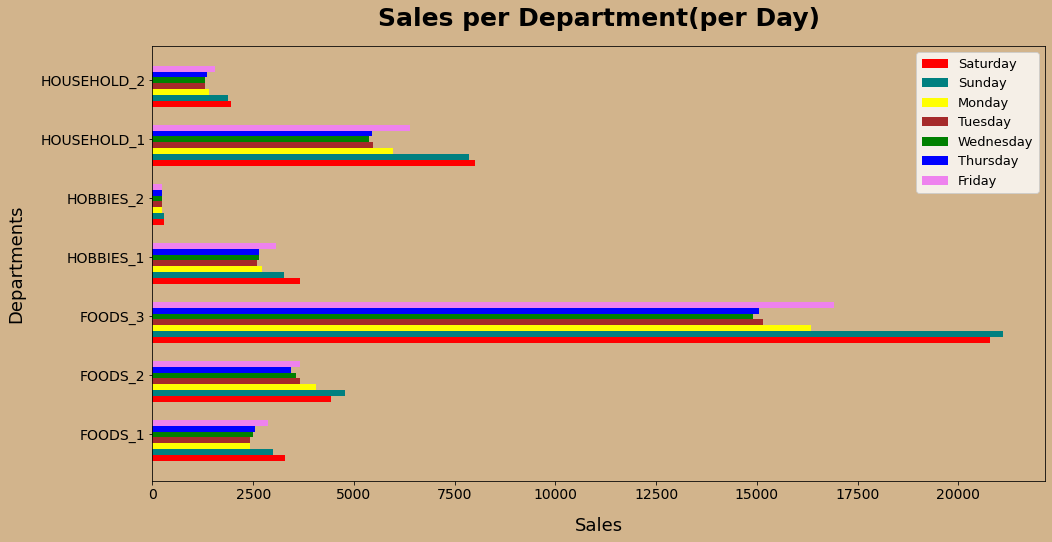

In [ ]:
dept=['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']
labels=dept #https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
d=sales_train_evaluation_.groupby(['dept_id']).sum().transpose()
#https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
d.columns=d.columns.add_categories('index') 
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(cal_[['wday','d']],on='d')
df2=pd.DataFrame(columns=['wday','sales'])
for i in dept:
  df1=df[[i,'wday']].groupby(['wday']).median().reset_index().rename({i:'sales'},axis=1)
  l=[]
  for j in range(7):
    l.append(i)
  df1['dept']=l
  df2=pd.concat([df2,df1])
df2=df2.reset_index().drop(['index'],axis=1)
df3=df2.groupby(['wday','dept']).median().reset_index()
de=[]
for i in range(1,8):
    de.append(df3.loc[df3['wday']==i]['sales'].tolist())
x=np.arange(len(labels))  # the label locations
width=0.1  # the width of the bars
fig,ax=plt.subplots(figsize=(16,8))
bar1=ax.barh(x-0.4,de[0],width,label='Saturday',color='red')
bar2=ax.barh(x-0.3,de[1],width,label='Sunday',color='teal')
bar3=ax.barh(x-0.2,de[2],width,label='Monday',color='yellow')
bar4=ax.barh(x-0.1,de[3],width,label='Tuesday',color='brown')
bar5=ax.barh(x,de[4],width,label='Wednesday',color='green')
bar6=ax.barh(x+0.1,de[5],width,label='Thursday',color='blue')
bar7=ax.barh(x+0.2,de[6],width,label='Friday',color='violet')
ax.set_xlabel('Sales',fontsize=18,labelpad=15)
ax.set_ylabel('Departments',fontsize=18,labelpad=15)
ax.set_title('Sales per Department(per Day)',loc='center',fontsize=25,pad='20',fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend(fontsize=13)      
ax.set_facecolor("tan")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
fig.set_facecolor("tan")
plt.show()

* Sales on Saturday,Sunday is higher than on weekdays 

* HOOBIES_2 Department have least sales 

* FOOD_3 Department have highest sales 

In [ ]:
l=[]
dept_id=['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']
for i in dept_id:
  d=revenue.loc[revenue['dept_id']==i]
  l.append(d.shape[0])
c=pd.DataFrame()
c['dept_id']=dept_id
c['no_of_items']=l
c['percent']=np.round(c['no_of_items']/c['no_of_items'].sum()*100,2)
c

,dept_id,no_of_items,percent
0,FOODS_1,3591218,7.66
1,FOODS_2,5631795,12.01
2,FOODS_3,12575300,26.82
3,HOBBIES_1,6585079,14.05
4,HOBBIES_2,2215806,4.73
5,HOUSEHOLD_1,7946519,16.95
6,HOUSEHOLD_2,8335960,17.78


* No. of items in FOODS_3 department is highest among all departments. 

* This may be the reason why FOODS_3 have highest sales among all departments 

* No. of items in HOBBIES_2 department is lowest among all departments.

* This may be the reason why HOBBIES_2 have lowest sales among all departments

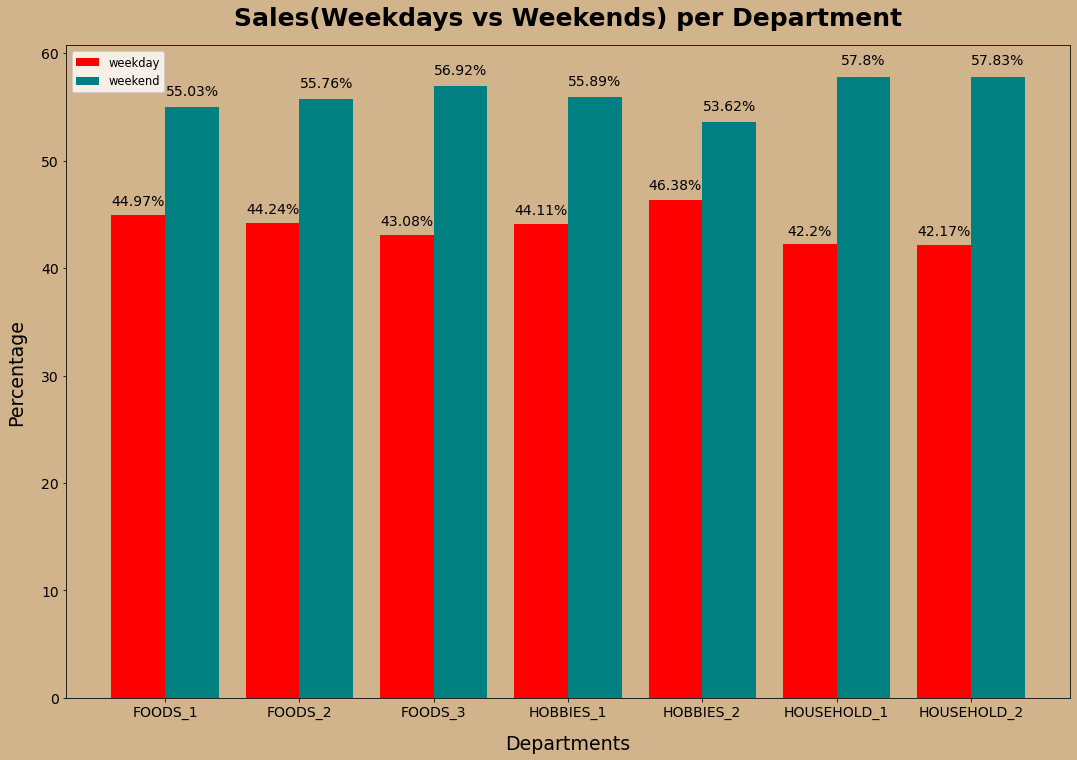

In [ ]:
weekday=[]
weekend=[]
dept=['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']
labels=dept #https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
d=sales_train_evaluation_.groupby(['dept_id']).sum().transpose()
#https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
d.columns=d.columns.add_categories('index') 
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(cal_[['is_weekend','d']],on='d')
for i in dept:
  df1=df[[i,'is_weekend']].groupby(['is_weekend']).mean().reset_index()
  df1['percentage']=np.round(df1[i]/df1[i].sum()*100,2)
  weekday.append(df1.loc[df1['is_weekend']==0]['percentage'].tolist())
  weekend.append(df1.loc[df1['is_weekend']==1]['percentage'].tolist())
weekday=[i for j in weekday  for i in j]
weekend=[i for j in weekend  for i in j]
x=np.arange(len(labels))  # the label locations
width=0.4  # the width of the bars
fig,ax=plt.subplots(figsize=(18,12))
bar1=ax.bar(x-width/2,weekday,width,label='weekday',color='red')
bar2=ax.bar(x+width/2,weekend,width,label='weekend',color='teal')
ax.set_ylabel('Percentage',fontsize=19,labelpad=15)
ax.set_xlabel('Departments',fontsize=19,labelpad=15)
ax.set_title('Sales(Weekdays vs Weekends) per Department',loc='center',fontsize=25,pad='20',fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=11.5)      
ax.set_facecolor("tan")
patch1(bar1,ax)
patch1(bar2,ax)
ax.set_facecolor("tan")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
fig.set_facecolor("tan")
plt.show()

* Sales on weekends are higher than weekdays for each Department 

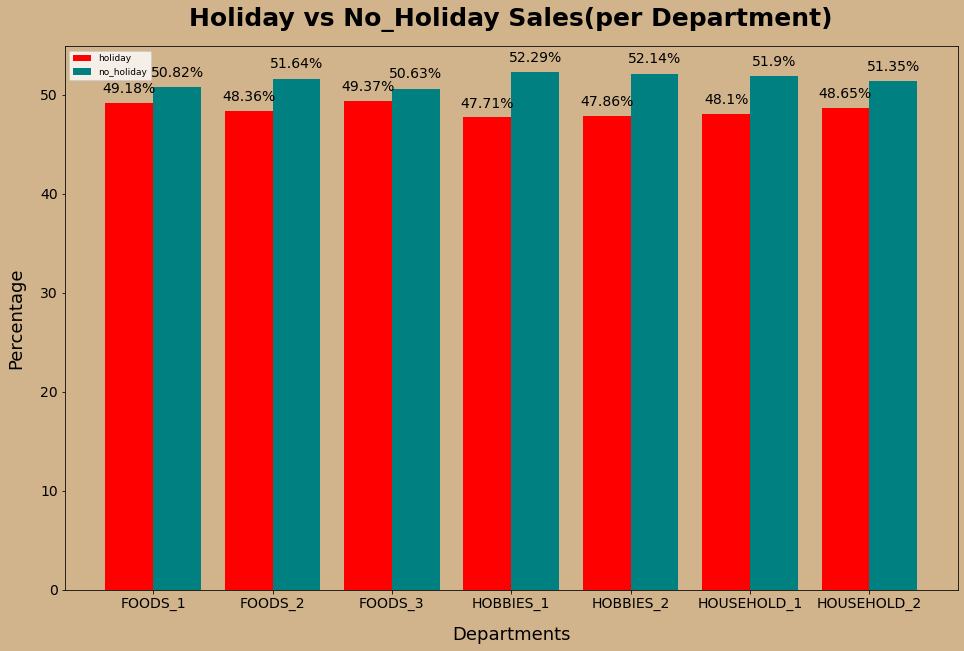

In [ ]:
holiday=[]
no_holiday=[]
dept=['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']
labels=dept #https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
d=sales_train_evaluation_.groupby(['dept_id']).sum().transpose()
#https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
d=d.reset_index().rename(columns={'index':'d'})
d.columns=d.columns.add_categories('index') 
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(cal_[['is_holiday','d']],on='d')
for i in dept:
  df1=df[[i,'is_holiday']].groupby(['is_holiday']).mean().reset_index()
  df1['percentage']=np.round(df1[i]/df1[i].sum()*100,2)
  holiday.append(df1.loc[df1['is_holiday']==1]['percentage'].tolist())
  no_holiday.append(df1.loc[df1['is_holiday']==0]['percentage'].tolist())
holiday=[i for j in holiday  for i in j]
no_holiday=[i for j in no_holiday for i in j]
x=np.arange(len(labels))  # the label locations
width=0.4  # the width of the bars
fig,ax=plt.subplots(figsize=(16,10))
bar1=ax.bar(x-width/2,holiday,width,label='holiday',color='red')
bar2=ax.bar(x+width/2,no_holiday,width,label='no_holiday',color='teal')
patch1(bar1,ax)
patch1(bar2,ax)
ax.set_ylabel('Percentage',fontsize=18,labelpad=15)
ax.set_xlabel('Departments',fontsize=18,labelpad=15)
ax.set_title('Holiday vs No_Holiday Sales(per Department)',loc='center',fontsize=25,pad='20',fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=9,loc='upper left')      
ax.set_facecolor("tan")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
fig.set_facecolor("tan")
plt.show()

* Sales on non holiday days are higher than days with holiday for each Department

In [ ]:
def snap(k):
  snap=[]
  no_snap=[]
  dept=['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']
  labels=dept #https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
  d=sales_train_evaluation_.groupby(['dept_id']).sum().transpose()
  #https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
  d.columns=d.columns.add_categories('index') 
  d=d.reset_index().rename(columns={'index':'d'})
  df=d.merge(cal_[[k,'d']],on='d')
  for i in dept:
    df1=df[[i,k]].groupby([k]).mean().reset_index()
    df1['percentage']=np.round(df1[i]/df1[i].sum()*100,2)
    snap.append(df1.loc[df1[k]=='snap']['percentage'].tolist())
    no_snap.append(df1.loc[df1[k]=='no_snap']['percentage'].tolist())
  snap=[i for j in snap  for i in j]
  no_snap=[i for j in no_snap for i in j]
  x=np.arange(len(labels))  # the label locations
  width=0.4  # the width of the bars
  fig,ax=plt.subplots(figsize=(16,10))
  bar1=ax.bar(x-width/2,snap,width,label=k,color='red')
  bar2=ax.bar(x+width/2,no_snap,width,label='no_'+k,color='teal')
  patch1(bar1,ax)
  patch1(bar2,ax)
  ax.set_ylabel('Percentage',fontsize=18,labelpad=15)
  ax.set_xlabel('Departments',fontsize=18,labelpad=15)
  ax.set_title('Snap vs No_Snap Sales(per Department) for State '+k.split('_')[1],loc='center',fontsize=25,pad='20',fontweight='bold')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend(fontsize=11,loc='upper left')      
  ax.set_facecolor("tan")
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)
  fig.set_facecolor("tan")
  plt.show()

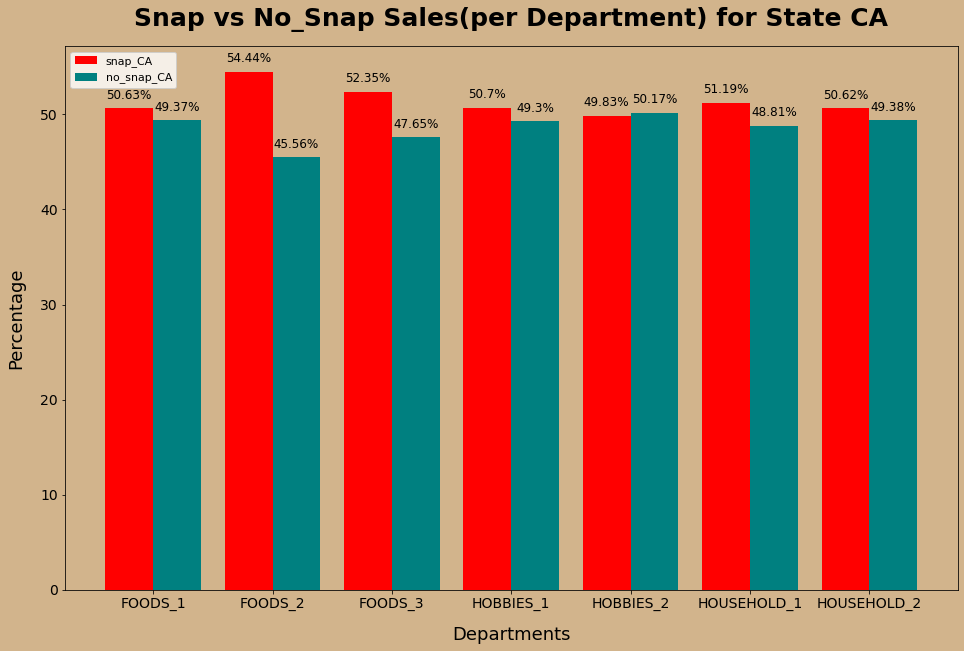

In [ ]:
snap('snap_CA')

* FOODS_2, FOODS_3
  * On snap days sales are higher than on non-snap days 

* FOODS_1, HOBBIES_1, HOUSEHOLD_1, HOUSEHOLD_2
  * On snap days sales are slightly higher than on non-snap days (not much difference)

* HOBBIES_2
  * On non-snap days sales are slightly higher than on snap days (almost same)

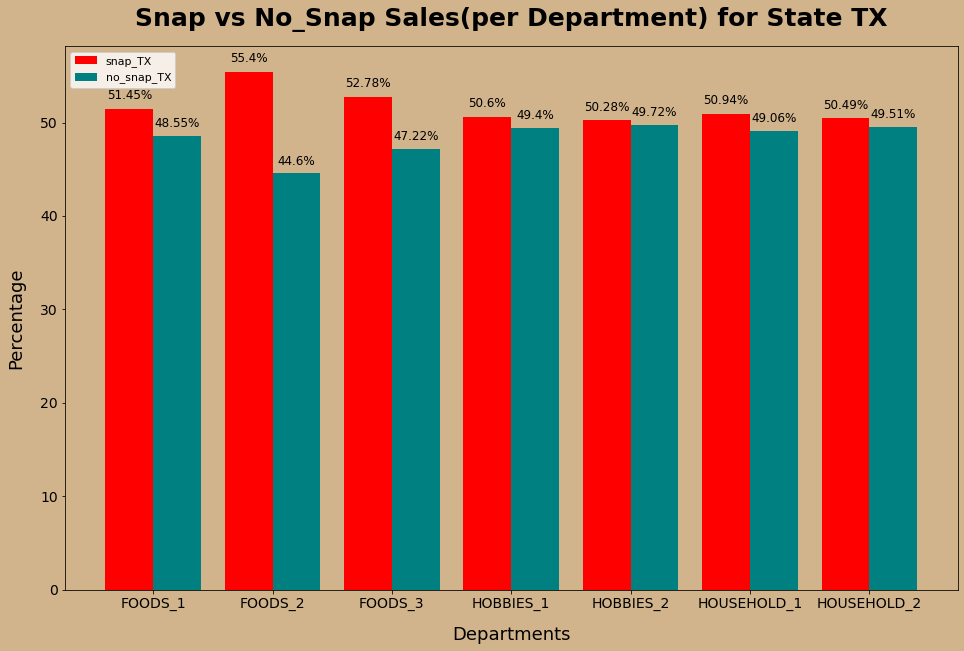

In [ ]:
snap('snap_TX')

* FOODS_1, FOODS_2, FOODS_3
  * On snap days sales are higher than on non-snap days

* HOBBIES_1, HOBBIES_2, HOUSEHOLD_1, HOUSEHOLD_2
  * On snap days sales are slightly higher than on non-snap days (not much difference)

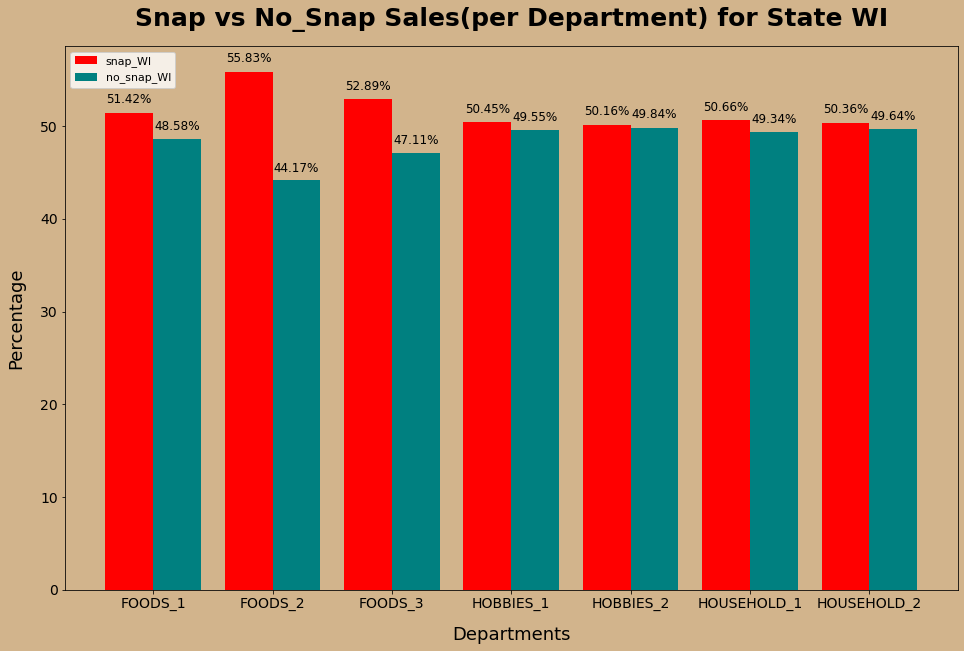

In [ ]:
snap('snap_WI')

* FOODS_1, FOODS_2, FOODS_3
  * On snap days sales are higher than on non-snap days

* HOBBIES_1, HOBBIES_2, HOUSEHOLD_1, HOUSEHOLD_2
  * On snap days sales are slightly higher than on non-snap days (not much difference)

#3.2. Category

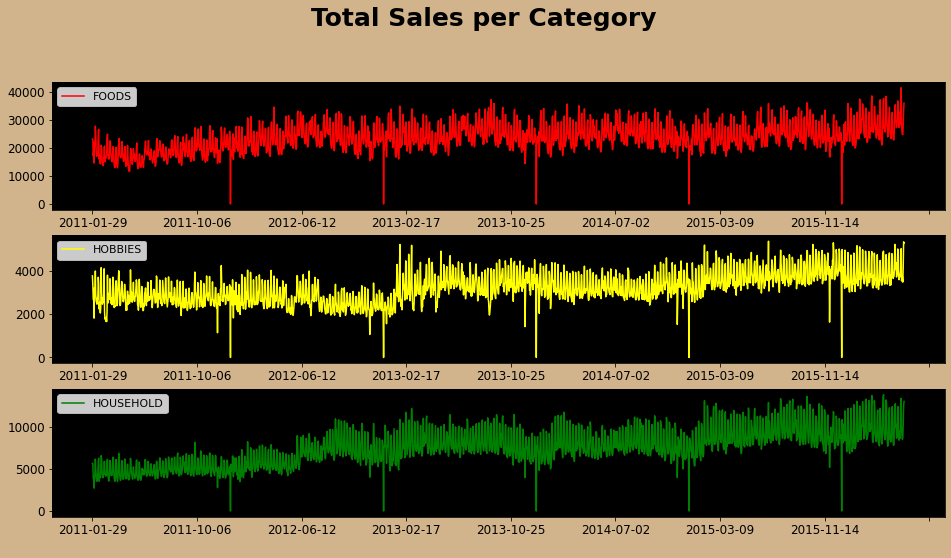

In [ ]:
d=sales_train_evaluation_.groupby(['cat_id']).sum().transpose()
#https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
d.columns=d.columns.add_categories('index') 
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(calendar_[['date','d']],on='d')
fig,axes=plt.subplots(3,1,figsize=(16,8))
fig.suptitle('Total Sales per Category',fontsize=25,fontweight='bold',y=1.01)
x1(df,'FOODS',axes[0],'red')
x1(df,'HOBBIES',axes[1],'yellow')
x1(df,'HOUSEHOLD',axes[2],'green')
fig.set_facecolor("tan")
plt.show()

* From all above subplots we can observe that days at last of every year have "Zero" sales It might be because of Christmas days.

* May be during chirstmas day the store remains closed

In [ ]:
 #https://www.kite.com/python/answers/how-to-drop-rows-with-all-zeros-in-a-pandas-dataframe-in-python#:~:text=DataFrame%20as%20(df%20!%3D,non%2Dzero%20values%20using%20pandas.
m=(df==0).any(axis=1) 
c=df.loc[m]
l=c['d']
d=cal_.loc[cal_['d'].isin(l)]
d

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_weekend,events_per_day,is_holiday,month_
330,2011-12-25,11148,Sunday,2,Dec,2011,d_331,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,1,1,1,12
696,2012-12-25,11248,Tuesday,4,Dec,2012,d_697,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12
1061,2013-12-25,11348,Wednesday,5,Dec,2013,d_1062,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12
1426,2014-12-25,11447,Thursday,6,Dec,2014,d_1427,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12
1791,2015-12-25,11547,Friday,7,Dec,2015,d_1792,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12


* One can observe that each year on Christmas Day there is zero sales

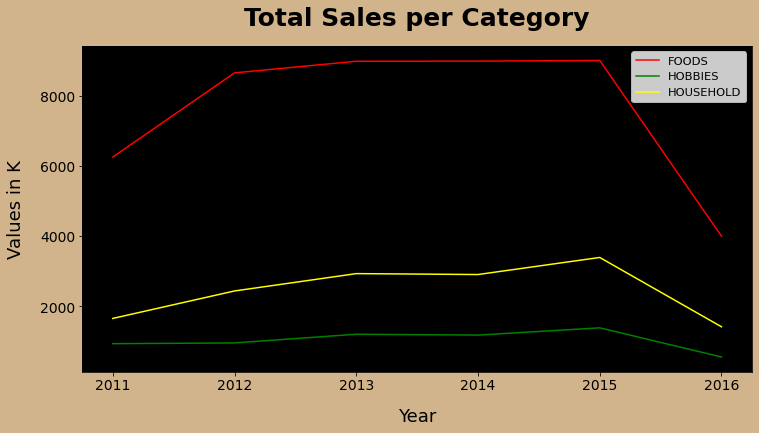

In [ ]:
d=sales_train_evaluation_.groupby(['cat_id']).sum().transpose()
#https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
d.columns=d.columns.add_categories('index') 
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(calendar_[['year','d']],on='d')
cat=['FOODS','HOBBIES','HOUSEHOLD']
color=['red','green','yellow']
plt.figure(figsize=(12,6),facecolor='tan')
func1('year',cat,color)
plt.ylabel("Values in K",fontsize=18,labelpad=15)
plt.xlabel("Year",fontsize=18,labelpad=15)
plt.title("Total Sales per Category",loc='center',fontsize=25,pad='20',fontweight='bold')
plt.legend(fontsize=11.49)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axes().set_facecolor("black")
plt.show()

* Sales of FOODS is highest among all three Category.We can observe huge difference in sales of FOODS as compared to sales of HOBBIES, HOUSEHOLD

* Sales of HOBBIES is lowest among all three Category

* Difference between sales among HOBBIES and HOUSEHOLD is not huge

* Sales of HOBBIES is almost constant from 2011 to 2015 year 

* Sales of HOUSEHOLD raises gradually from 2011 to 2015

* Sales of every Category after 2015 fall suddenly 

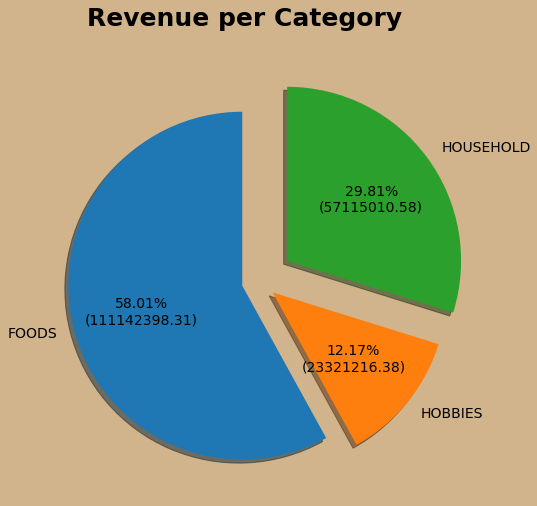

In [ ]:
#https://www.askpython.com/python/plot-customize-pie-chart-in-python
def func(v,p): #https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
  a=p*sum(v)/100
  return "{:.2f}%\n({:.2f})".format(p,a)
d=revenue[['cat_id','cost']]
cat=['FOODS','HOBBIES','HOUSEHOLD']
l=[]
for i in cat:
  s=[]
  s=d[d['cat_id']==i]['cost'].tolist()
  l.append(np.round(sum(s),2))
d=pd.DataFrame(columns=['cat','cost'])
d['cat']=cat
d['cost']=l
fig,ax=plt.subplots(figsize=(16,8))
e=(0.1,0.1,0.2) 
ax.pie(d['cost'],explode=e,labels=d['cat'],shadow=True,startangle=90,autopct=lambda p: func(d['cost'].tolist(),p),textprops={'fontsize': 14})
fig.suptitle('Revenue per Category',fontsize=25,fontweight='bold')
fig.set_facecolor("tan")
plt.show()

* FOODS Category have highest Revenue

* HOBBIES Category have lowest Revenue

* Alone FOODS Category contributes aprox. 60% of Revenue 



In [ ]:
l=[]
cat_id=['FOODS','HOUSEHOLD','HOBBIES']
for i in cat_id:
  d=revenue.loc[revenue['cat_id']==i]
  l.append(d.shape[0])
c=pd.DataFrame()
c['cat_id']=cat_id
c['no_of_items']=l
c['percent']=np.round(c['no_of_items']/c['no_of_items'].sum()*100,2)
c

,cat_id,no_of_items,percent
0,FOODS,21798313,46.50
1,HOUSEHOLD,16282479,34.73
2,HOBBIES,8800885,18.77


* No. of items in FOODS category is highest among all categories

* This may be the reason why FOODS have highest sales & Revenue among all categories

* No. of items in HOBBIES category is lowest among all categories

* This may be the reason why HOBBIES have lowest sales & Revenue among all categories

#3.3. Store

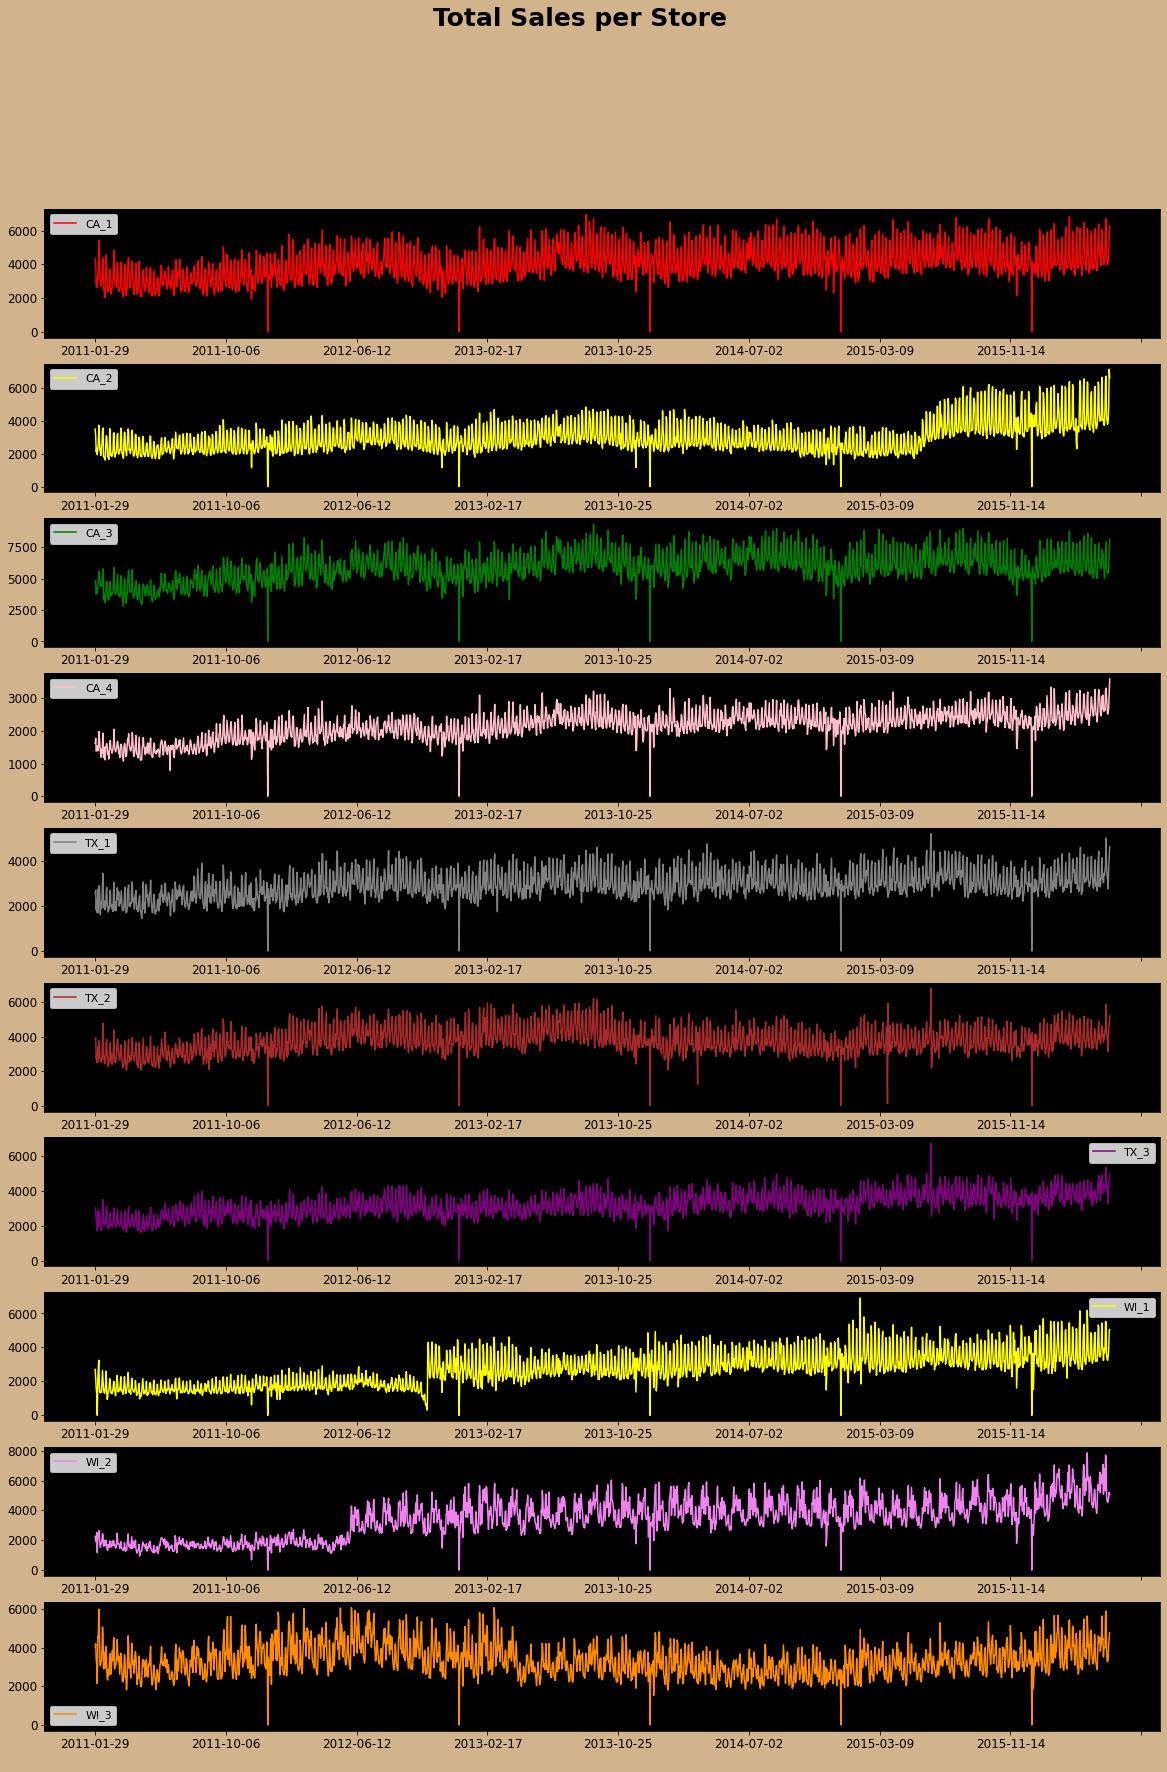

In [ ]:
d=sales_train_evaluation_.groupby(['store_id']).sum().transpose()
#https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
d.columns=d.columns.add_categories('index')
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(calendar_[['date','d']],on='d')
fig,axes=plt.subplots(10,1,figsize=(20,28))
fig.suptitle('Total Sales per Store ',fontsize=25,fontweight='bold')
x1(df,'CA_1',axes[0],'red')
x1(df,'CA_2',axes[1],'yellow')
x1(df,'CA_3',axes[2],'green')
x1(df,'CA_4',axes[3],'pink')
x1(df,'TX_1',axes[4],'gray')
x1(df,'TX_2',axes[5],'brown')
x1(df,'TX_3',axes[6],'purple')
x1(df,'WI_1',axes[7],'yellow')
x1(df,'WI_2',axes[8],'violet')
x1(df,'WI_3',axes[9],'darkorange')
fig.set_facecolor("tan")
plt.show()

* From all above subplots we can observe that days at last of every year have "Zero" sales It might be because of Christmas days.

* May be during chirstmas day the store remains closed

In [ ]:
#https://www.kite.com/python/answers/how-to-drop-rows-with-all-zeros-in-a-pandas-dataframe-in-python#:~:text=DataFrame%20as%20(df%20!%3D,non%2Dzero%20values%20using%20pandas.
c=df.loc[m]m=(df==0).any(axis=1) 
c=df.loc[m]
l=c['d']
d=cal_.loc[cal_['d'].isin(l)]
d

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_weekend,events_per_day,is_holiday,month_
330,2011-12-25,11148,Sunday,2,Dec,2011,d_331,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,1,1,1,12
696,2012-12-25,11248,Tuesday,4,Dec,2012,d_697,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12
1061,2013-12-25,11348,Wednesday,5,Dec,2013,d_1062,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12
1426,2014-12-25,11447,Thursday,6,Dec,2014,d_1427,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12
1791,2015-12-25,11547,Friday,7,Dec,2015,d_1792,Christmas,National,no_event,no_event,no_snap,no_snap,no_snap,0,1,1,12


* One can observe that each year on Christmas Day there is zero sales

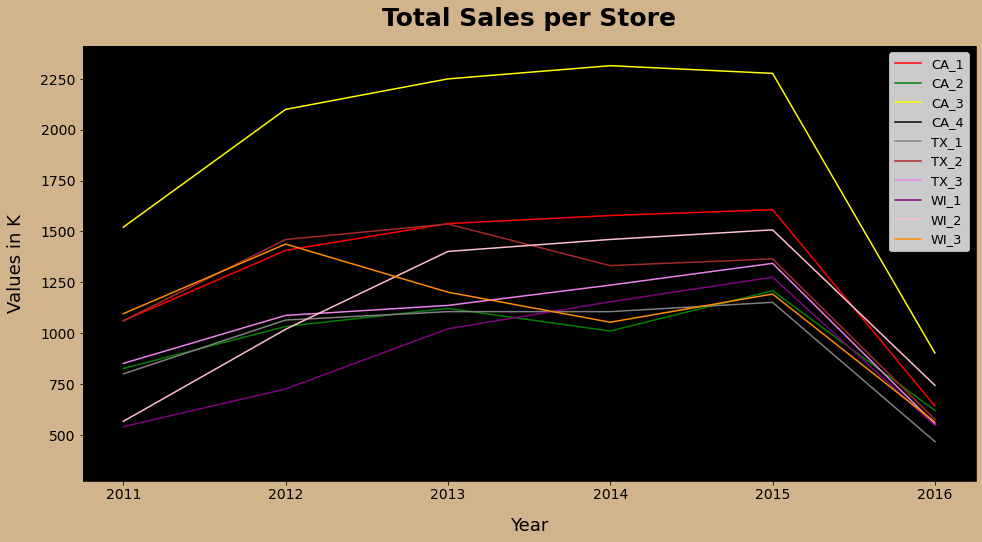

In [ ]:
d=sales_train_evaluation_.groupby(['store_id']).sum().transpose()
#https://stackoverflow.com/questions/60595374/typeerror-cannot-insert-an-item-into-a-categoricalindex-that-is-not-already-an
d.columns=d.columns.add_categories('index') 
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(calendar_[['year','d']],on='d')
stores=['CA_1','CA_2','CA_3','CA_4','TX_1','TX_2','TX_3','WI_1','WI_2','WI_3']
color=['red','green','yellow','black','gray','brown','violet','purple','pink','darkorange']
plt.figure(figsize=(16,8),facecolor='tan')
func1('year',stores,color)
plt.ylabel("Values in K",fontsize=18,labelpad=15)
plt.xlabel("Year",fontsize=18,labelpad=15)
plt.title("Total Sales per Store",loc='center',fontsize=25,pad='20',fontweight='bold')
plt.axes().set_facecolor("black")
plt.legend(fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* Sales of CA_3 store is highest among all Stores.We can observe huge difference in sales of CA_3 as compared to all other Stores.

* Sales of every Store after 2015 fall suddenly (because we dont have whole 2016 year data).

#3.4. State

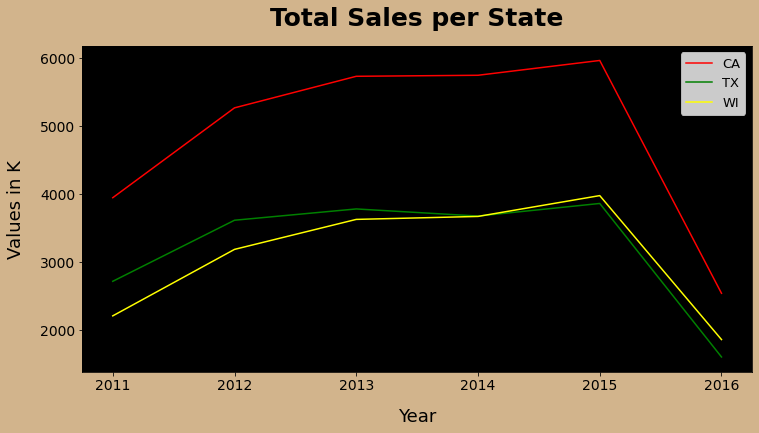

In [ ]:
d=sales_train_evaluation_.groupby(['state_id']).sum().transpose()
d.columns=d.columns.add_categories('index') 
d=d.reset_index().rename(columns={'index':'d'})
df=d.merge(calendar_[['year','d']],on='d')
state=['CA','TX','WI']
color=['red','green','yellow']
plt.figure(figsize=(12,6),facecolor='tan')
func1('year',state,color)
plt.ylabel("Values in K",fontsize=18,labelpad=15)
plt.xlabel("Year",fontsize=18,labelpad=15)
plt.title("Total Sales per State",loc='center',fontsize=25,pad='20',fontweight='bold')
plt.axes().set_facecolor("black")
plt.legend(fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* Sales is highest in State CA among all three states

* Sales of TX, WI almost overlaps.Before 2014 sales in TX is higher than WI while after 2014 sales of WI becomes higher than TX

* Sales in every state rises till year 2015 and after thats falls suddenly in 2016 

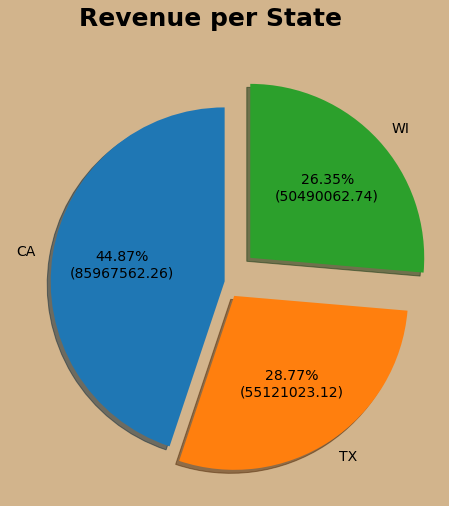

In [ ]:
#https://www.askpython.com/python/plot-customize-pie-chart-in-python
def func(v,p): #https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
  a=p*sum(v)/100
  return "{:.2f}%\n({:.2f})".format(p,a)
d=revenue[['state_id','cost']]
state=['CA','TX','WI']
l=[]
for i in state:
  s=[]
  s=d[d['state_id']==i]['cost'].tolist()
  l.append(np.round(sum(s),2))
d=pd.DataFrame(columns=['state','cost'])
d['state']=state
d['cost']=l
fig,ax=plt.subplots(figsize=(16,8))
e=(0,0.1,0.2) 
ax.pie(d['cost'],explode=e,labels=d['state'],shadow=True,startangle=90,autopct=lambda p: func(d['cost'].tolist(),p),textprops={'fontsize': 14})
fig.suptitle('Revenue per State',fontsize=25,fontweight='bold')
fig.set_facecolor("tan")
plt.show()

* CA State have highest Revenue

* WI State have lowest Revenue

* Revenue of WI, TX State is almost same (not much difference)

In [ ]:
state_id=['CA','TX','WI']
l=[]
for i in state_id:
  d=revenue.loc[revenue['state_id']==i]
  l.append(d.shape[0])
c=pd.DataFrame()
c['state_id']=state_id
c['no_of_items']=l
c['percent']=np.round(c['no_of_items']/c['no_of_items'].sum()*100,2)
c

,state_id,no_of_items,percent
0,CA,18559286,39.59
1,TX,14343003,30.59
2,WI,13979388,29.82


* No. of items in CA State is highest among all categories

* This may be the reason why FOODS have highest sales & Revenue among all categories

* No. of items in TX, WI State is almost same

* This may be the reason why TX, WI States have almost same Sales & Revenue (not much difference)

#3.5. Item with Max. Sales

In [ ]:
d=revenue[['item_id','demand']]
#https://www.geeksforgeeks.org/get-the-index-of-maximum-value-in-dataframe-column/
max=d['demand'].idxmax() 
print("Item with maximum Sales ",d['item_id'][max])

Item with maximum Sales  FOODS_3_090


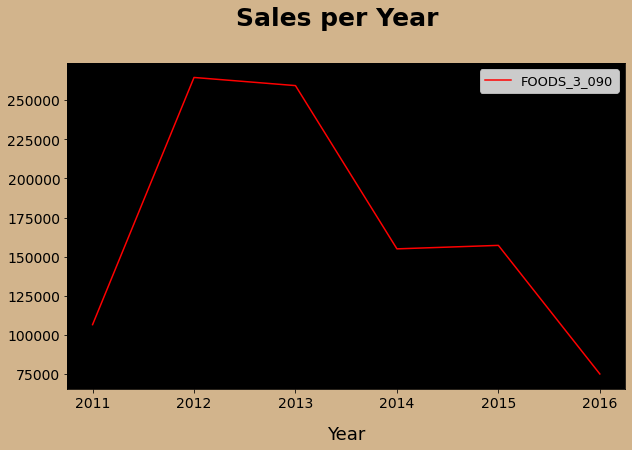

In [ ]:
d=revenue.loc[revenue['item_id']=='FOODS_3_090']
d=d[['month_','day','year','demand']]
c=d[['year','demand']]
fig,ax=plt.subplots(figsize=(10,6))
fig.suptitle('Sales per Year',fontsize=25,fontweight='bold',y=1.01)
c.groupby('year').sum().plot(kind='line',ax=ax,color='red')
ax.set_facecolor('black')
ax.set_xlabel('Year',fontsize=18,labelpad=15)
ax.tick_params(axis='both',labelsize=14)
ax.legend(['FOODS_3_090'],fontsize=13)
fig.set_facecolor("tan")
plt.show()

* Sales increases from year 2011 to 2012 & than decreases till 2014

* Sales remains constatnt from year 2014 to 2015 

* Sales decreases from 2015 to 2016 bcoz we dont have whole 2016 year data (Data upto May 2016 is only avaliable)

In [ ]:
def x2(df,i,k,ax,color):
  c=d.loc[d['year']==k]
  c=c[[i,'demand']]
  c.groupby(i).sum().plot(kind='line',ax=ax,color=color)
  ax.set_facecolor('black')
  ax.set_xlabel('Month',fontsize=18,labelpad=15)
  ax.tick_params(axis='both',labelsize=14)
  ax.legend(['Year_'+str(k)],fontsize=13)

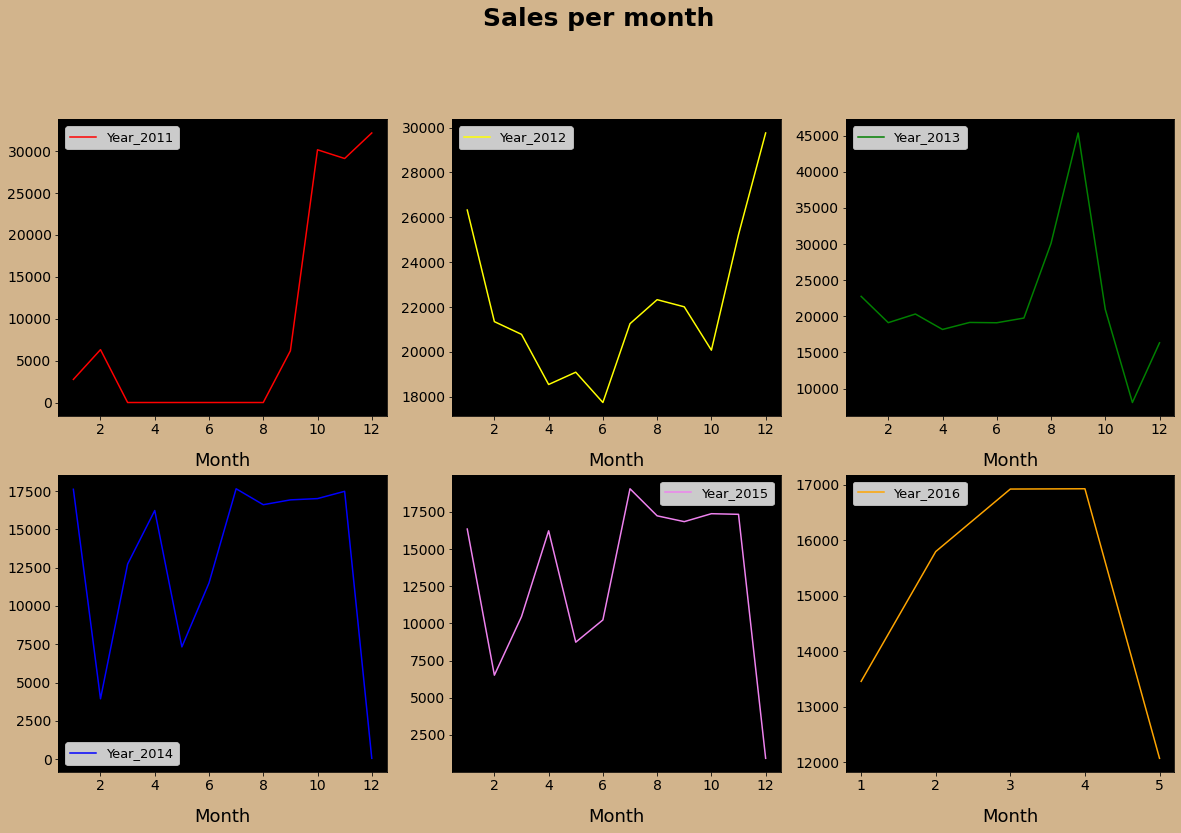

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(20,12))
fig.suptitle('Sales per month',fontsize=25,fontweight='bold',y=1.01)
x2(c,'month_',2011,ax[0,0],'red')
x2(c,'month_',2012,ax[0,1],'yellow')
x2(c,'month_',2013,ax[0,2],'green')
x2(c,'month_',2014,ax[1,0],'blue')
x2(c,'month_',2015,ax[1,1],'violet')
x2(c,'month_',2016,ax[1,2],'orange')
fig.set_facecolor("tan")
plt.show()

In [ ]:
def x3(d,y,m,m_,n,size):
  for i in range(len(m)):
    e=d.loc[d['year']==y]
    e=e.loc[e['month_']==m[i]]
    e=e[['day','demand']]
    e=e.groupby('day').sum().reset_index() 
    fig=plt.figure(figsize=size)
    ax=plt.subplot(n,1,i+1)
    ax.set_title(str(m_[i])+' '+str(y),fontsize=20,fontweight='bold')
    ax.scatter(e['day'].tolist(),e['demand'].tolist(),color='r',zorder=1)
    ax.plot(e['day'].tolist(),e['demand'].tolist(),color='b',zorder=2)
    ax.tick_params(axis='both',labelsize=12)
    ax.set_ylabel('Sales',fontsize=16,labelpad=5)
    ax.set_xlabel('Days',fontsize=16,labelpad=5)
    ax.grid(True,color ="black")
    ax.set_facecolor("tan")
    fig.set_facecolor("tan")
  plt.tight_layout()
  plt.show()

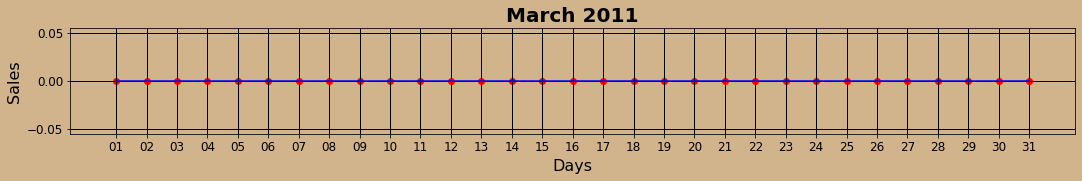

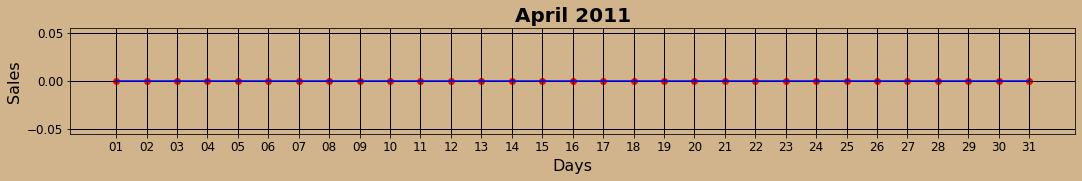

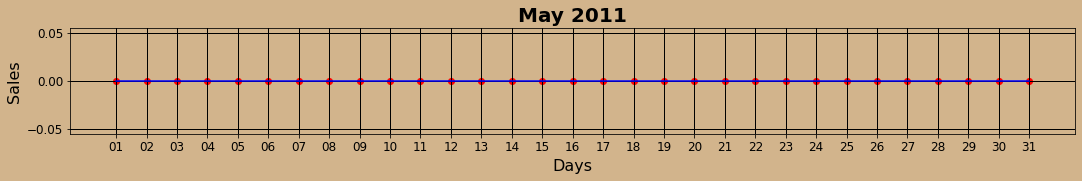

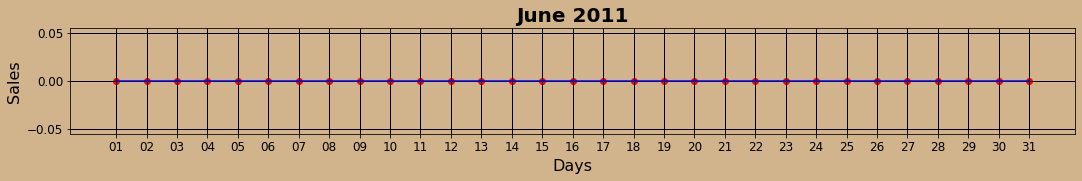

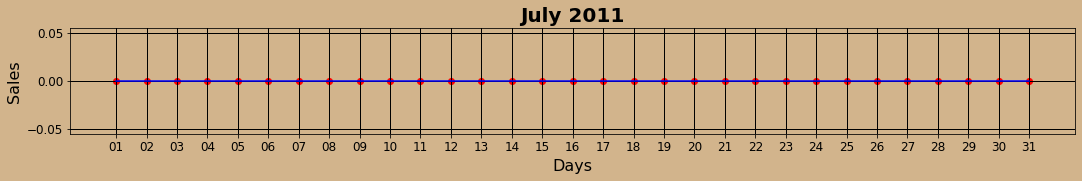

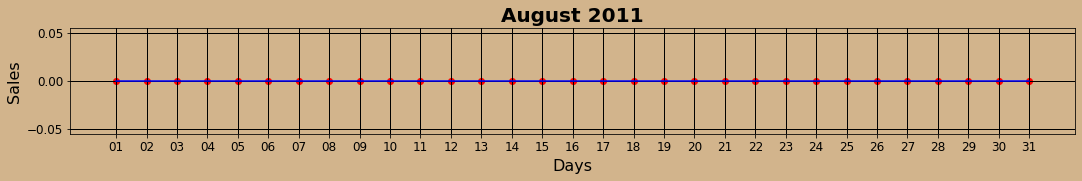

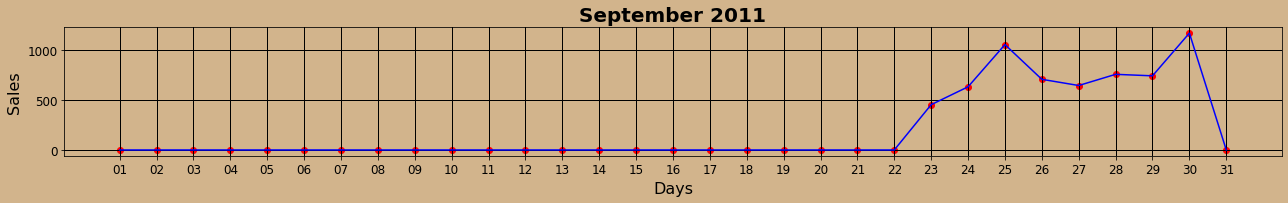

In [ ]:
m=[3,4,5,6,7,8,9]
m_=['March','April','May','June','July','August','September']
x3(d,2011,m,m_,len(m),(18,16))

* In year 2011
  * From March to 22nd September sales is zero ( might be FOODS_3_090 not available during this peroid )

  * After 22nd September sales increases again 

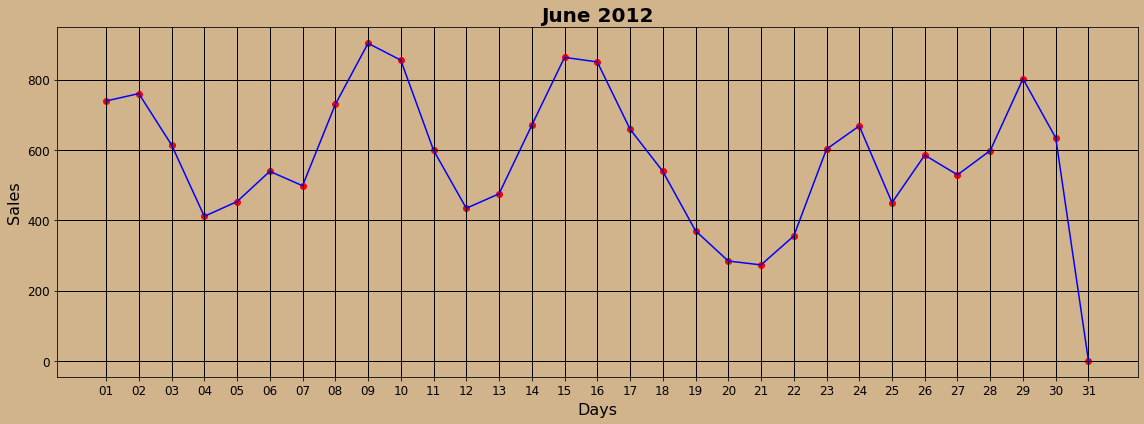

In [ ]:
m=[6]
m_=['June']
x3(d,2012,m,m_,len(m),(16,6))

* In year 2012

  * June have lowest sales 

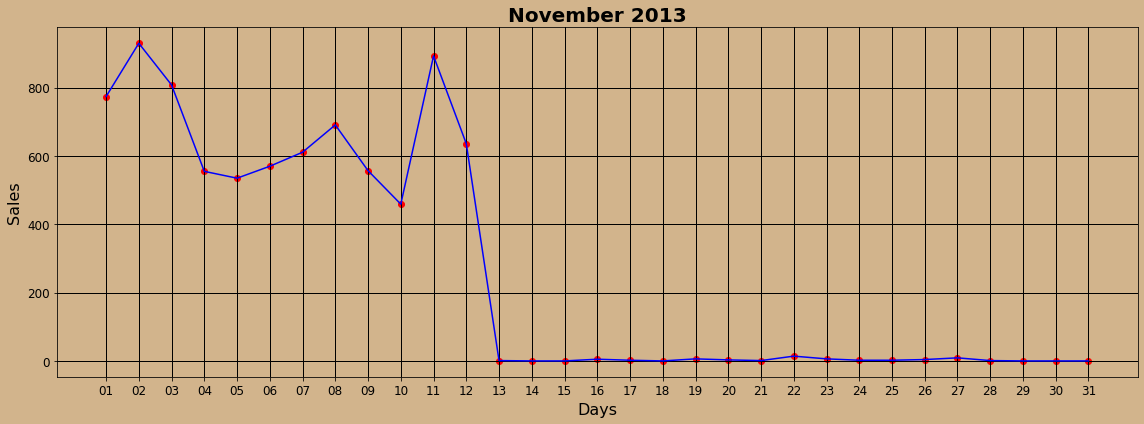

In [ ]:
m=[11]
m_=['November']
x3(d,2013,m,m_,len(m),(16,6))

* In year 2013

  * November have lowest sales 

  * After 12th November sales becomes zero

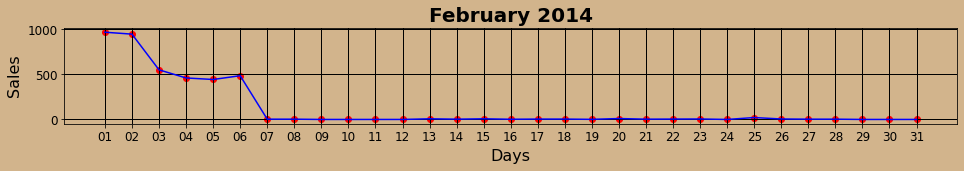

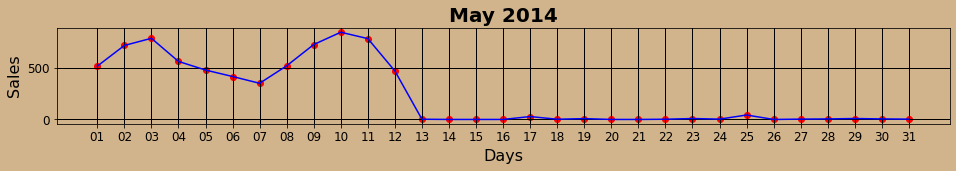

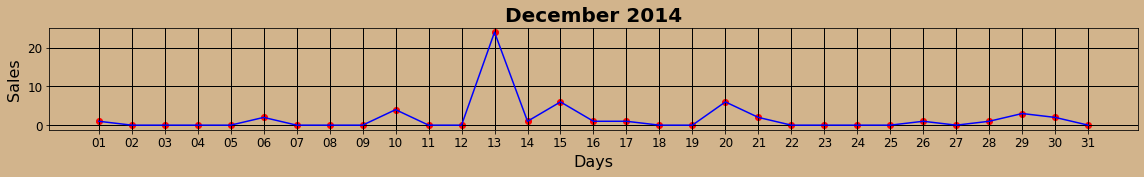

In [ ]:
m=[2,5,12]
m_=['February','May','December']
x3(d,2014,m,m_,len(m),(16,6))

* In Year 2014

  * December have lowest sales.Except few days sales remains zero

  * Some downfall in sales also seen in February.After 6th Feb sales becomes zero

  * Some downfall in sales also seen in May.After 12th May sales becomes zero

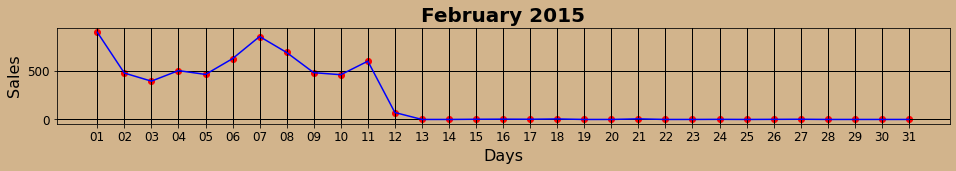

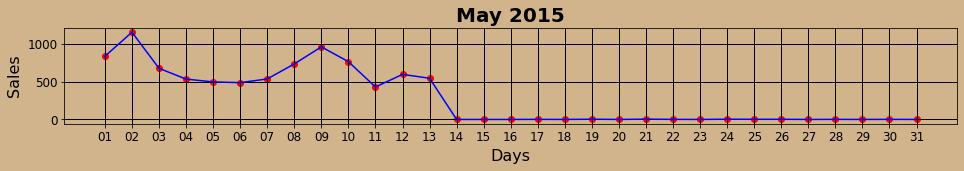

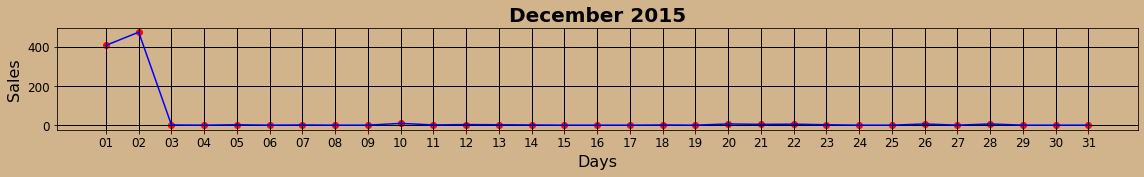

In [ ]:
m=[2,5,12]
m_=['February','May','December']
x3(d,2015,m,m_,len(m),(16,6))

* In Year 2015
  
  * December have lowest sales.After 2nd decemeber sales becomes zero
  
  * Some downfall in sales also seen in February.After 12th Feb sales becomes zero
  
  * Some downfall in sales also seen in May.After 13th May sales becomes zero


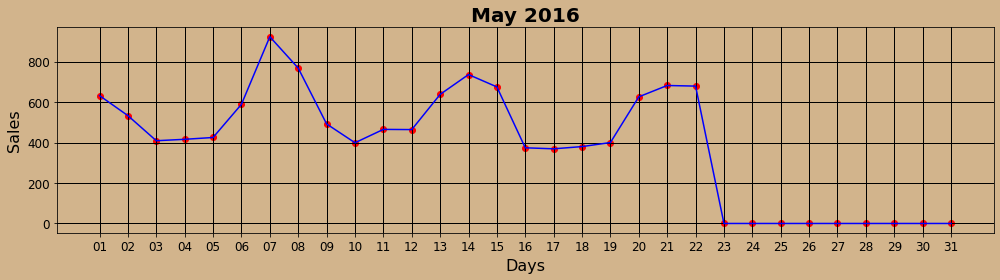

In [ ]:
m=[5]
m_=['May']
x3(d,2016,m,m_,len(m),(14,4))

* Year 2016
  * No Data available after May 

  * After 22nd May sales become zero

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Sell Price

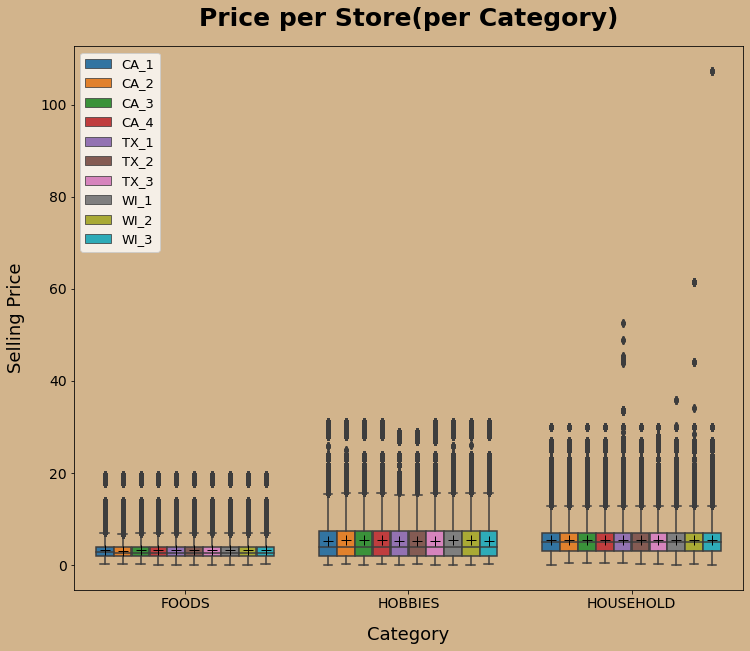

In [ ]:
d=revenue[['cat_id','store_id','sell_price']]
fig,ax=plt.subplots(figsize=(12,10))
#https://www.geeksforgeeks.org/how-to-show-mean-on-boxplot-using-seaborn-in-python/
sns.boxplot(x='cat_id',y='sell_price',data=d,showmeans=True,ax=ax,meanprops={"marker": "+","markeredgecolor": "black","markersize": "10"},hue='store_id') 
ax.set_ylabel('Selling Price',fontsize=18,labelpad=15)
ax.set_xlabel('Category',fontsize=18,labelpad=15)
ax.set_title('Price per Store(per Category)',loc='center',fontsize=25,pad='20',fontweight='bold')
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13)
ax.set_facecolor("tan")
fig.set_facecolor("tan")
plt.show()

* FOODS:

 * Sell price is almost same for every store 

 * Sell price is lowest among all categories 



* HOBBIES:
 
 * Sell price is same for every store 

 * Sell price higher than FOODS 

* HOUSEHOLD:

 * Sell price is highest among all categories 

 * Sometimes Sell price goes very high (more than 100)

In [ ]:
#https://www.kite.com/python/answers/how-to-select-unique-pandas-dataframe-rows-in-python
revenue[revenue['sell_price']>35][['store_id','item_id','cat_id','sell_price']].drop_duplicates() 

,store_id,item_id,cat_id,sell_price
12191403,WI_2,HOUSEHOLD_2_406,HOUSEHOLD,44.00000
14953857,TX_1,HOUSEHOLD_2_466,HOUSEHOLD,43.84375
16234150,TX_1,HOUSEHOLD_2_178,HOUSEHOLD,44.37500
17515017,TX_1,HOUSEHOLD_2_466,HOUSEHOLD,44.84375
18155307,TX_1,HOUSEHOLD_2_466,HOUSEHOLD,52.62500
18807733,WI_2,HOUSEHOLD_2_406,HOUSEHOLD,61.46875
25640542,WI_3,HOUSEHOLD_2_406,HOUSEHOLD,107.31250
26265647,TX_1,HOUSEHOLD_2_466,HOUSEHOLD,44.87500
34375987,TX_1,HOUSEHOLD_2_466,HOUSEHOLD,48.78125
45901207,TX_1,HOUSEHOLD_2_466,HOUSEHOLD,45.31250


* Outliers points in the dataset  

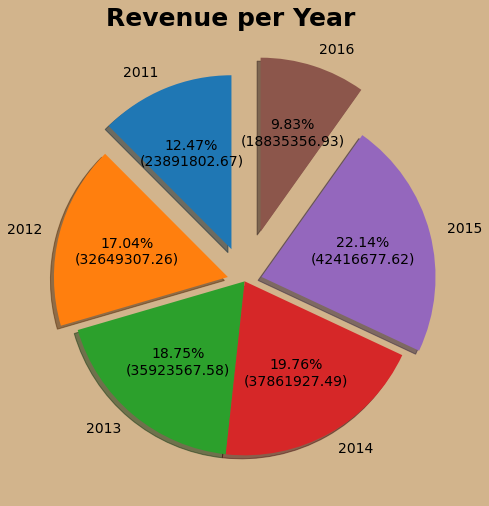

In [ ]:
#https://www.askpython.com/python/plot-customize-pie-chart-in-python
def func(v,p): #https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
  a=p*sum(v)/100
  return "{:.2f}%\n({:.2f})".format(p,a)
d=revenue[['year','cost']]
year=[2011,2012,2013,2014,2015,2016]
l=[]
for i in year:
  s=[]
  s=d[d['year']==i]['cost'].tolist()
  l.append(np.round(sum(s),2))
d=pd.DataFrame(columns=['year','cost'])
d['year']=year
d['cost']=l
fig,ax=plt.subplots(figsize=(16,8))
e=(0.2,0.1,0,0,0.1,0.3)
ax.pie(d['cost'],explode=e,labels=d['year'],shadow=True,startangle=90,autopct=lambda p: func(d['cost'].tolist(),p),textprops={'fontsize': 14})
fig.suptitle('Revenue per Year',fontsize=25,fontweight='bold')
fig.set_facecolor("tan")
plt.show()

* Revenue increases from year 2011 to 2015 

* Revenue decreases from year 2015 to 2016 it is not because of less sales in 2016 instead due to non availablity of Data (we have data till May 2016 only)